# NBaIoT SOM+Algos CLASSIFY

## Device 5

- Training on device 5 (using both Mirai and Gafgyt).
- Testing on device 5 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/huunoi/Projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

2023-02-17 17:16:18.890858: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/huunoi/Projects/research/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 5

In [8]:
train_index

5

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((62154, 115), (62154,)),
 ((330096, 115), (330096,)),
 ((436010, 115), (436010,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((43507, 115), (18647, 115), (43507,), (18647,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((231067, 115), (99029, 115), (231067,), (99029,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((305207, 115), (130803, 115), (305207,), (130803,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

43507


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(43507, 115) (43507,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(87014, 115) (87014,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(43507, 115) (43507,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(87014, 115) (87014,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(117676, 115) (117676,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((18647, 115), (99029, 115), (18647,), (99029,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(149450, 115) (149450,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(104615, 115) (104615,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [30]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, 
#                                                                  algo='rand')

### Test on the same device

#### Test on gafgyt

In [31]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [32]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [33]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [34]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [35]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='tpe')

### Test on first device

#### Test on gafgyt

In [36]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [37]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [38]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [39]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [40]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(87014, 115) (87014,)
------------Scale data-----------------
(87014, 115) (87014,)
X_train_scaled
[[ 8.04159172e-02  1.92372913e-01  1.16039280e-01 ...  1.24434530e-01
   1.29176147e-01  3.34644970e-01]
 [ 3.33450650e-03  6.91335893e-02  1.79751753e-05 ...  4.02994591e-18
  -1.48754395e-35 -9.69700794e-19]
 [ 3.30693475e-03  6.88489496e-02  1.21536303e-10 ...  9.50064968e-19
   3.35802001e-34  0.00000000e+00]
 ...
 [ 1.32304312e-02  7.74571518e-02  4.10934967e-04 ...  3.04603074e-04
  -1.99456882e-07 -4.10338588e-03]
 [ 3.30693456e-03  6.88489477e-02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.30693469e-03  6.88489483e-02  1.58070261e-11 ...  1.34261928e-18
   2.98245198e-34  5.83786086e-17]]
---------Normalize data--------------
(87014, 115) (87014,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.987     0.996     0.992     18647
           2      0.999     0.998     0.998     99029

    accuracy                          0.997    117676
   macro avg      0.993     0.997     0.995    117676
weighted avg      0.997     0.997     0.997    117676



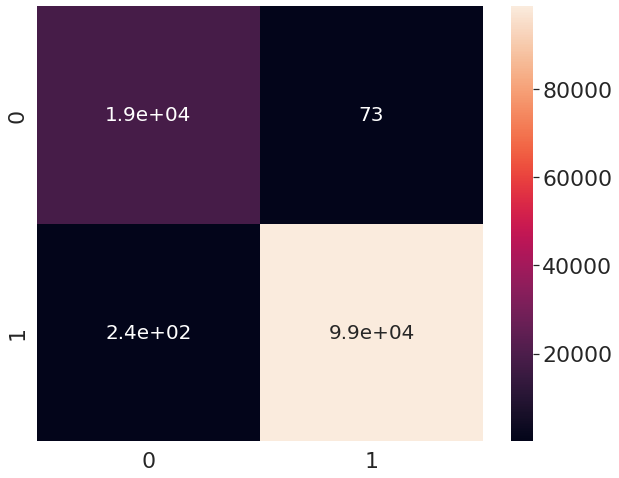

AUC score:  9.968358633517166e-01


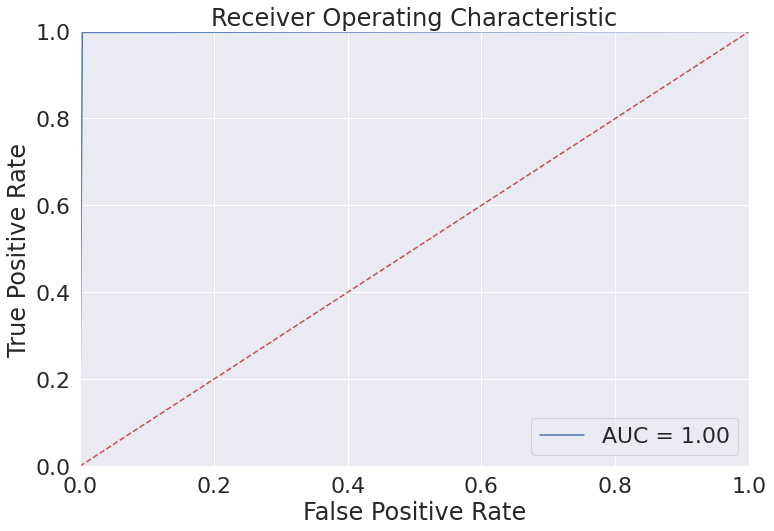

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [41]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.988     0.996     0.992     18647
           2      0.999     0.998     0.998     99029

    accuracy                          0.997    117676
   macro avg      0.994     0.997     0.995    117676
weighted avg      0.997     0.997     0.997    117676



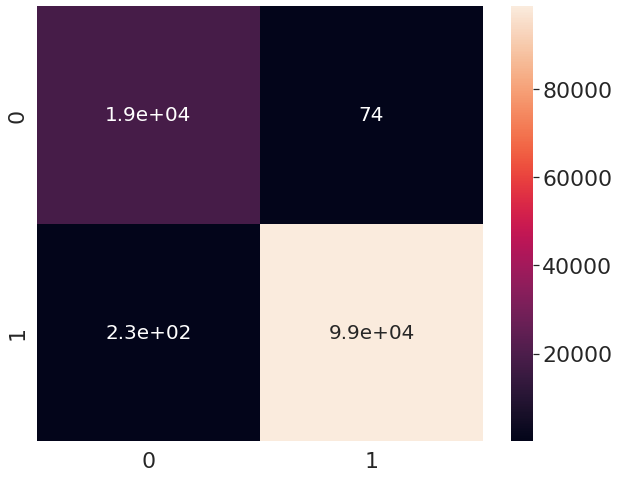

AUC score:  0.9968595396474325


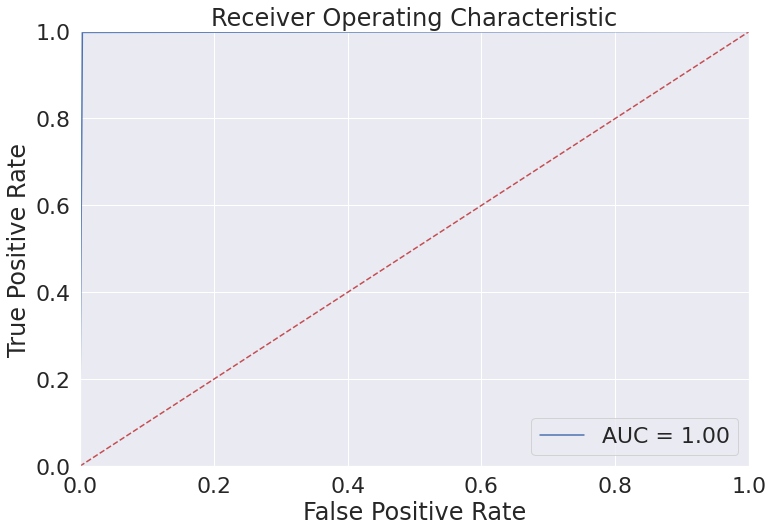

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='KNN')

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.987     0.996     0.992     18647
           2      0.999     0.998     0.998     99029

    accuracy                          0.997    117676
   macro avg      0.993     0.997     0.995    117676
weighted avg      0.997     0.997     0.997    117676



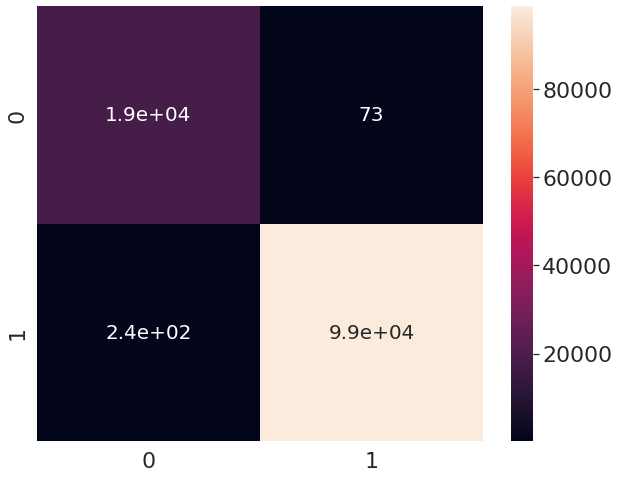

AUC score:  0.9968358633517166


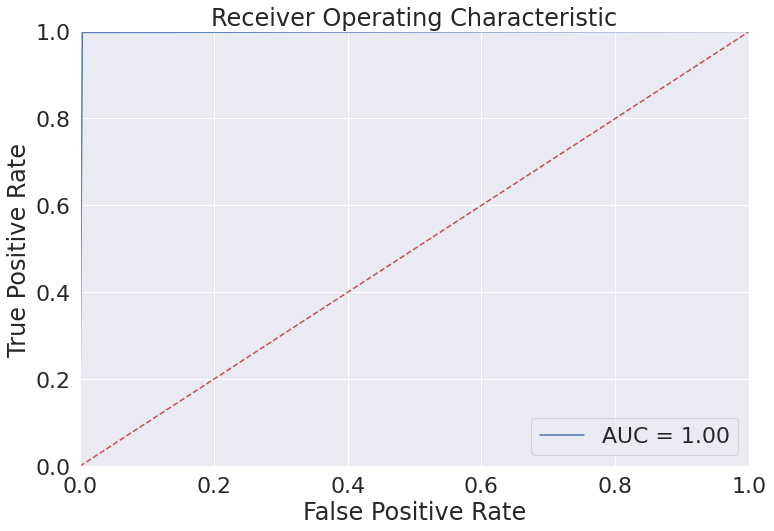

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SVM')

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.987     0.996     0.992     18647
           2      0.999     0.998     0.998     99029

    accuracy                          0.997    117676
   macro avg      0.993     0.997     0.995    117676
weighted avg      0.997     0.997     0.997    117676



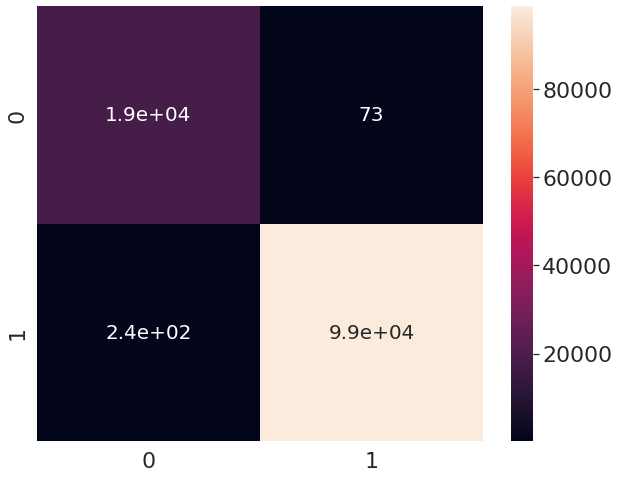

AUC score:  0.9968358633517166


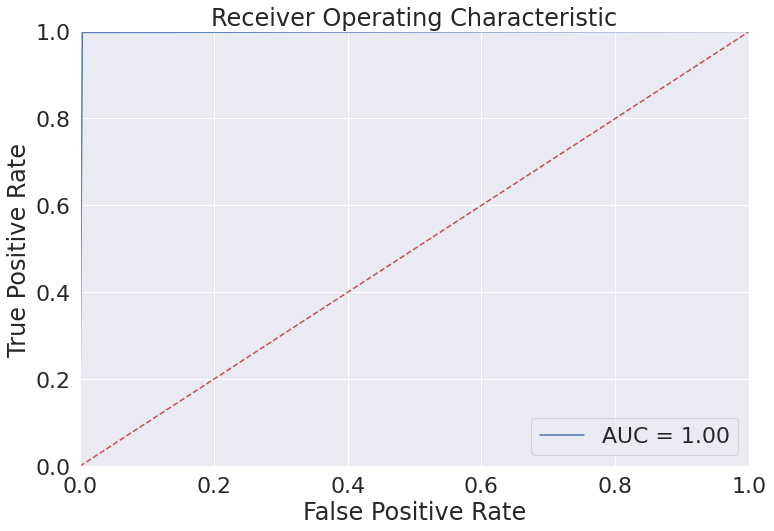

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [44]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SOFTMAX')

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.987     0.996     0.992     18647
           2      0.999     0.998     0.998     99029

    accuracy                          0.997    117676
   macro avg      0.993     0.997     0.995    117676
weighted avg      0.997     0.997     0.997    117676



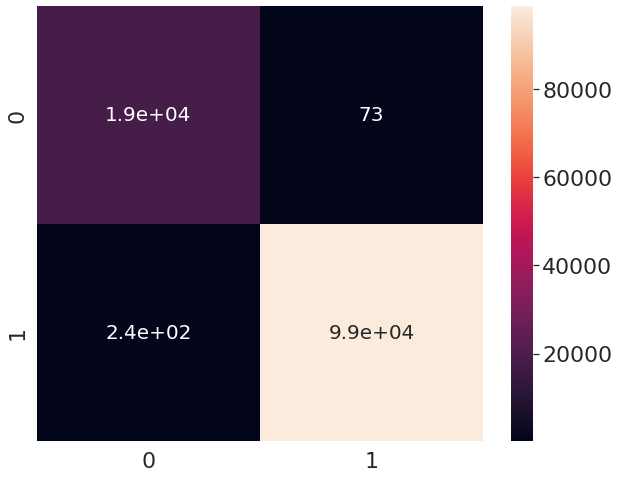

AUC score:  0.9968358633517166


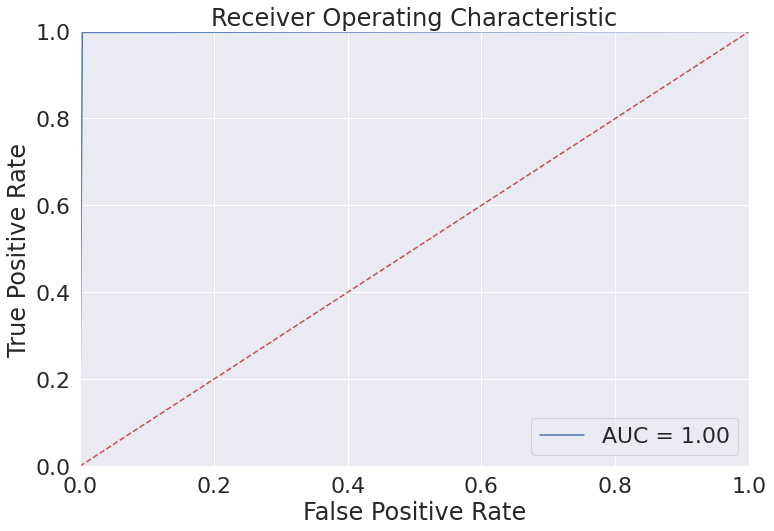

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='RF')

#### Test on Mirai

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.181     0.996     0.307     12929
           2      0.999     0.366     0.536     91686

    accuracy                          0.444    104615
   macro avg      0.590     0.681     0.421    104615
weighted avg      0.898     0.444     0.508    104615



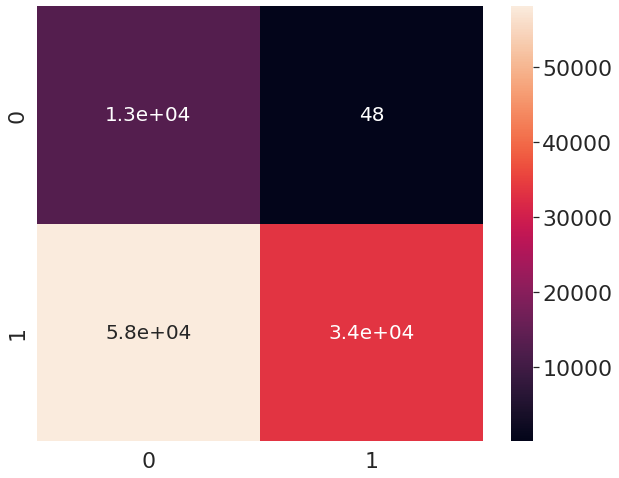

AUC score:  0.6812305478098839


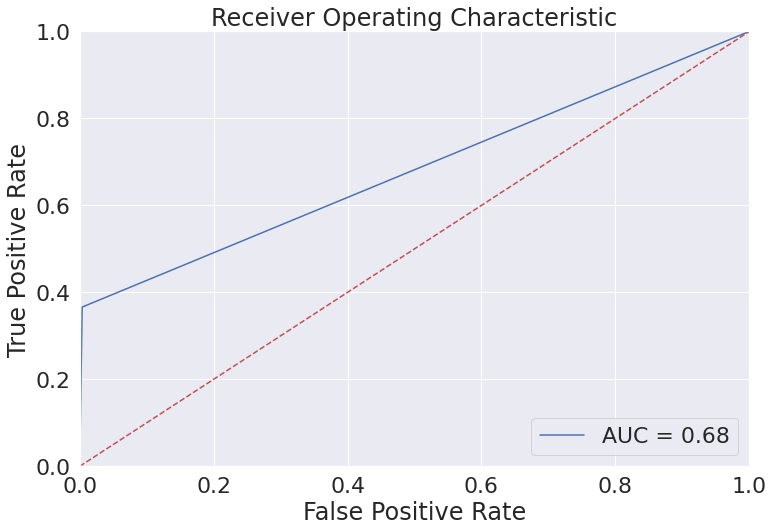

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.181     0.996     0.307     12929
           2      0.999     0.366     0.536     91686

    accuracy                          0.444    104615
   macro avg      0.590     0.681     0.421    104615
weighted avg      0.898     0.444     0.508    104615



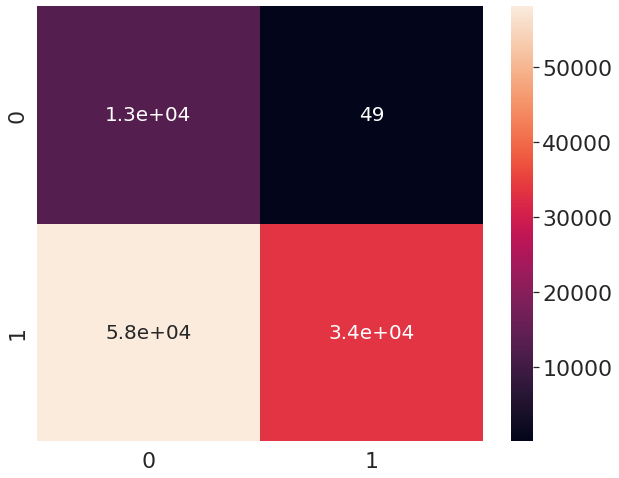

AUC score:  0.6811918750587044


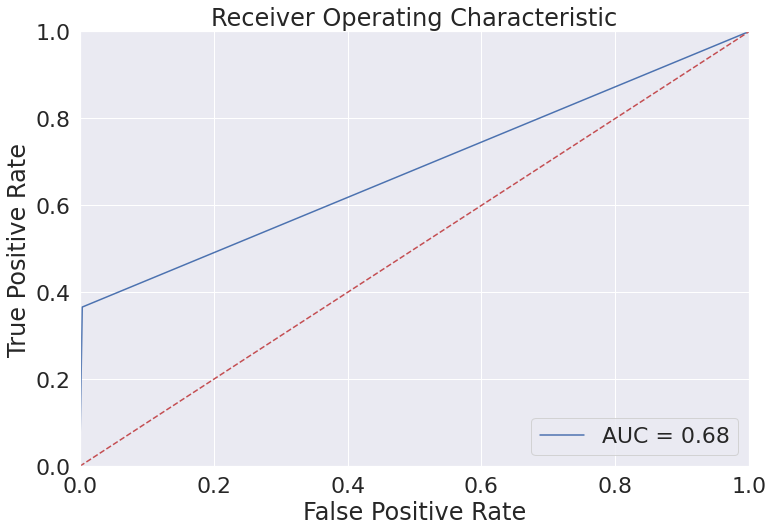

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [47]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='KNN')

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.181     0.996     0.307     12929
           2      0.999     0.366     0.536     91686

    accuracy                          0.444    104615
   macro avg      0.590     0.681     0.421    104615
weighted avg      0.898     0.444     0.508    104615



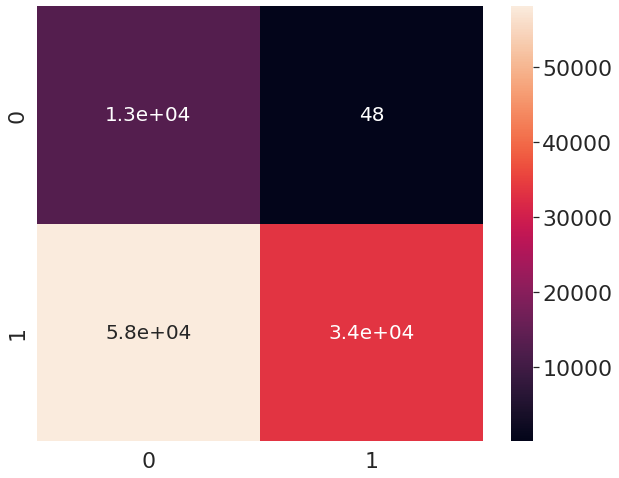

AUC score:  0.6812305478098839


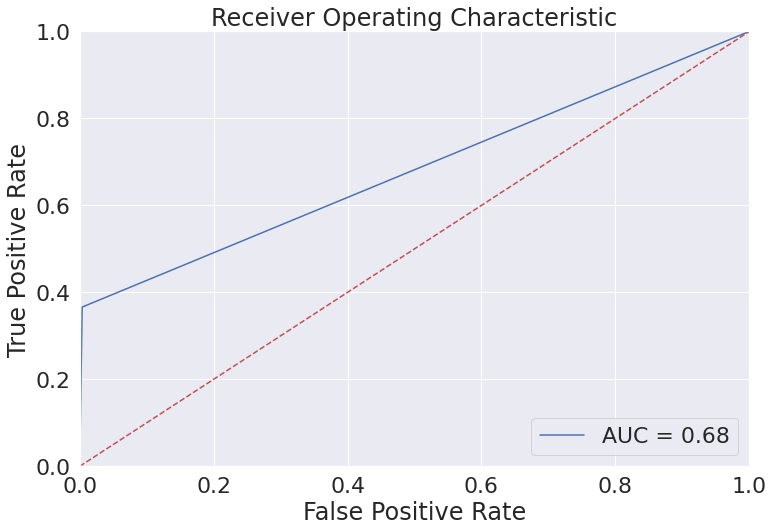

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SVM')

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.181     0.996     0.307     12929
           2      0.999     0.366     0.536     91686

    accuracy                          0.444    104615
   macro avg      0.590     0.681     0.421    104615
weighted avg      0.898     0.444     0.508    104615



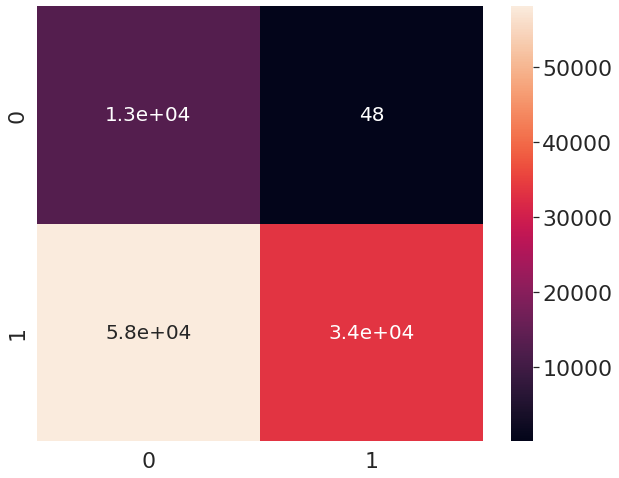

AUC score:  0.6812305478098839


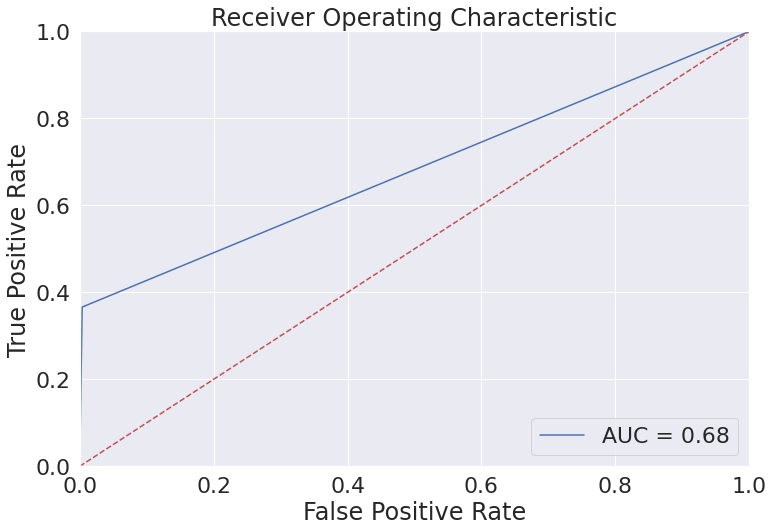

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SOFTMAX')

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.181     0.996     0.307     12929
           2      0.999     0.366     0.536     91686

    accuracy                          0.444    104615
   macro avg      0.590     0.681     0.421    104615
weighted avg      0.898     0.444     0.508    104615



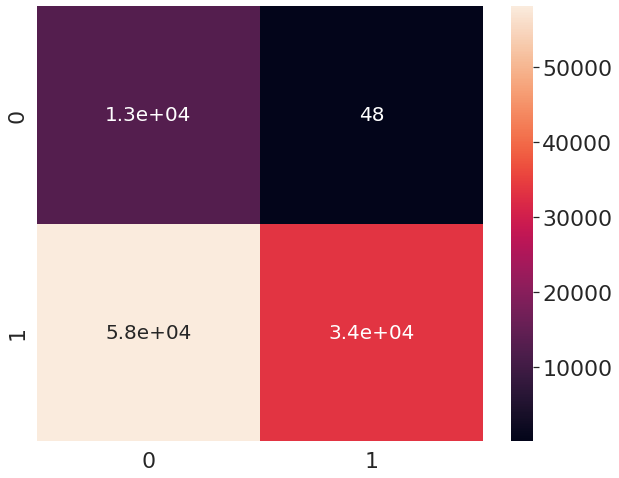

AUC score:  0.6812305478098839


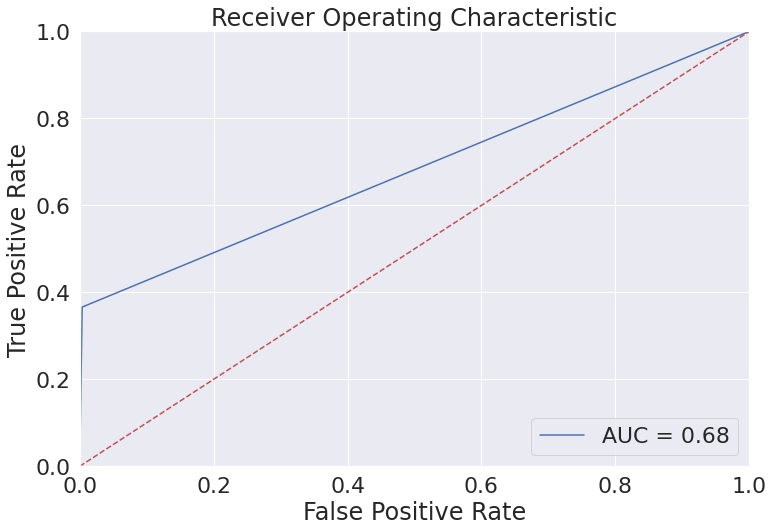

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [50]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='RF')


## 2.1.4. Anneal

### Train

In [51]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [52]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [53]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [54]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [55]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [56]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='rand')

### Test on the same device

#### Test on gafgyt

In [57]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [58]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [59]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [60]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [61]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='tpe')

### Test on the same device

#### Test on gafgyt

In [62]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [63]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [64]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [65]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [66]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
                                                                 y_train=y_train_mirai_1, algo='atpe')

--------------Training and testing in the same device----------------
(87014, 115) (87014,)
------------Scale data-----------------
(87014, 115) (87014,)
X_train_scaled
[[ 6.43453023e-02  2.84148817e-01  1.16039280e-01 ...  1.42249879e-01
   3.98396992e-01  4.99268165e-01]
 [ 2.66812636e-03  1.02115352e-01  1.79751753e-05 ...  4.60691513e-18
  -4.58779001e-35 -1.44672946e-18]
 [ 2.64606465e-03  1.01694918e-01  1.21536303e-10 ...  1.08608621e-18
   1.03565953e-33  0.00000000e+00]
 ...
 [ 1.05864128e-02  1.14409860e-01  4.10934967e-04 ...  3.48213238e-04
  -6.15152438e-07 -6.12198038e-03]
 [ 2.64606451e-03  1.01694915e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.64606461e-03  1.01694916e-01  1.58070261e-11 ...  1.53484271e-18
   9.19829185e-34  8.70970235e-17]]
---------Normalize data--------------
(87014, 115) (87014,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.756     0.996     0.860     18647
           2      0.999     0.940     0.968     99029

    accuracy                          0.948    117676
   macro avg      0.878     0.968     0.914    117676
weighted avg      0.961     0.948     0.951    117676



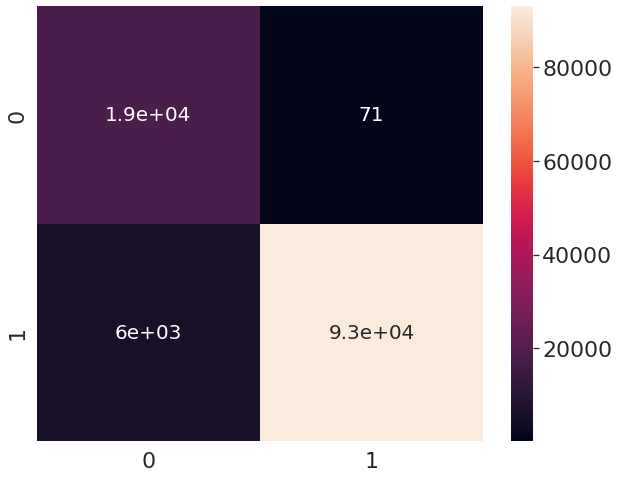

AUC score:  9.678525425085603e-01


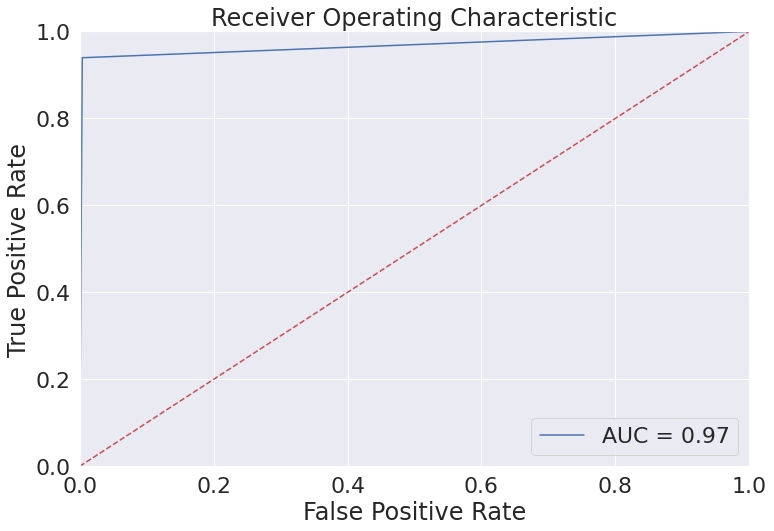

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.757     0.996     0.860     18647
           2      0.999     0.940     0.969     99029

    accuracy                          0.949    117676
   macro avg      0.878     0.968     0.914    117676
weighted avg      0.961     0.949     0.951    117676



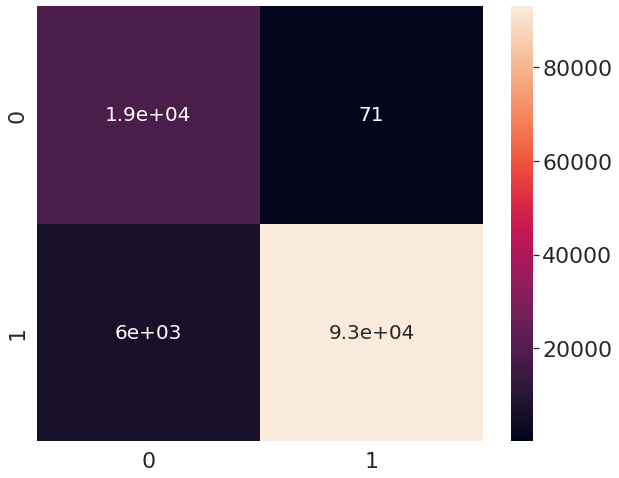

AUC score:  0.9679585720554608


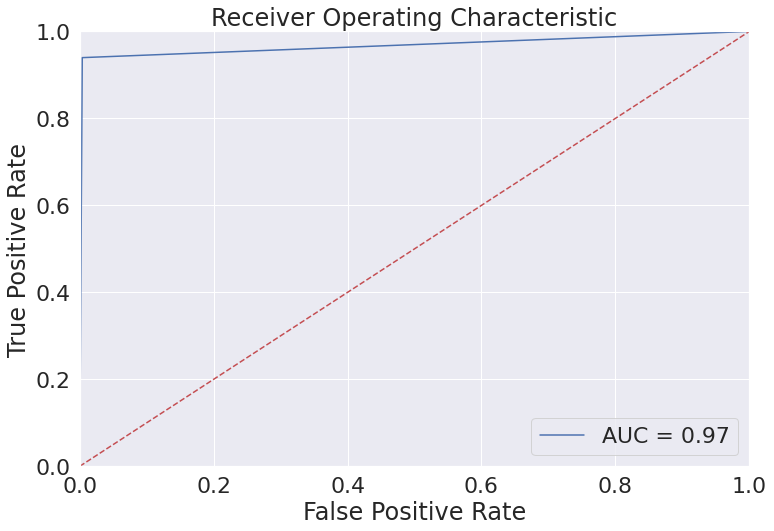

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [68]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'KNN')

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.756     0.996     0.860     18647
           2      0.999     0.940     0.968     99029

    accuracy                          0.948    117676
   macro avg      0.878     0.968     0.914    117676
weighted avg      0.961     0.948     0.951    117676



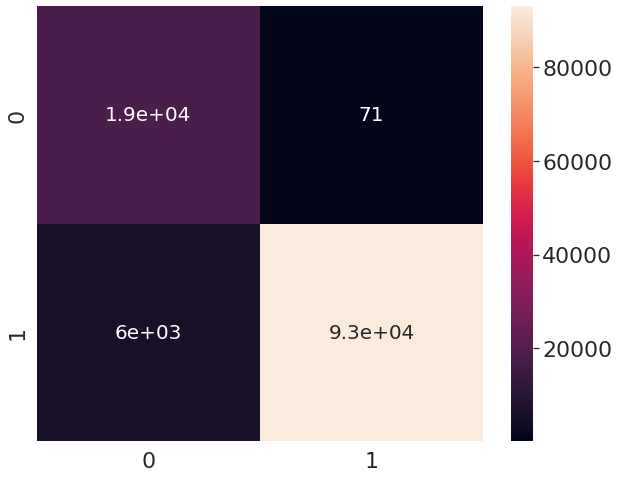

AUC score:  0.9678525425085603


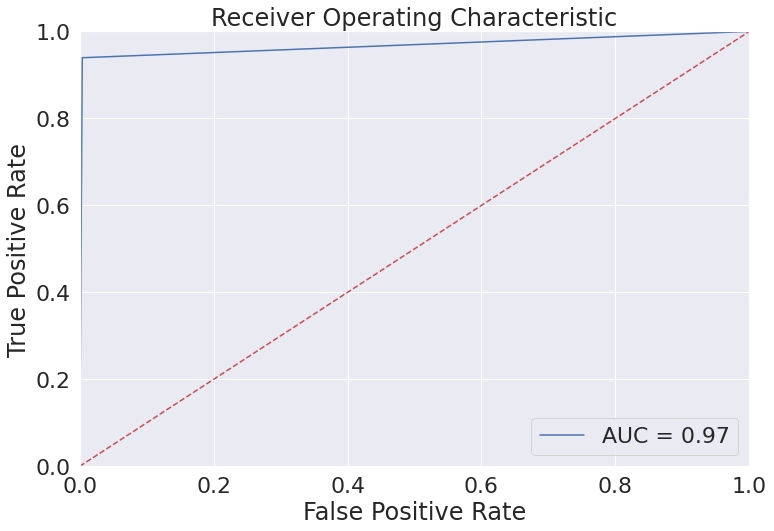

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SVM')

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.756     0.996     0.860     18647
           2      0.999     0.940     0.968     99029

    accuracy                          0.948    117676
   macro avg      0.878     0.968     0.914    117676
weighted avg      0.961     0.948     0.951    117676



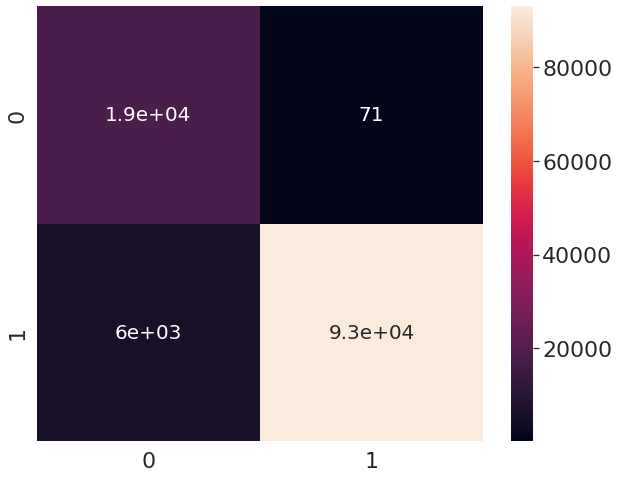

AUC score:  0.9678525425085603


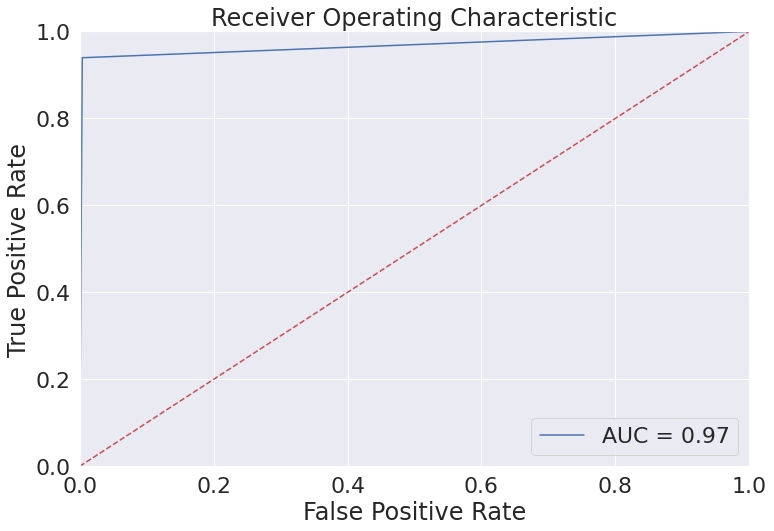

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SOFTMAX')

Shape:  (117676, 115) (117676,)
----------------------Test is starting----------------------
Scale data
Shape:  (117676, 115) (117676,)
Normalize data
Shape:  (117676, 115) (117676,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.756     0.996     0.860     18647
           2      0.999     0.940     0.968     99029

    accuracy                          0.948    117676
   macro avg      0.878     0.968     0.914    117676
weighted avg      0.961     0.948     0.951    117676



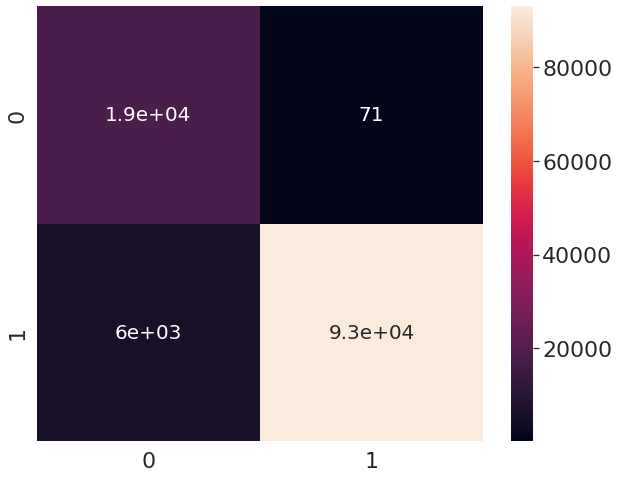

AUC score:  0.9678525425085603


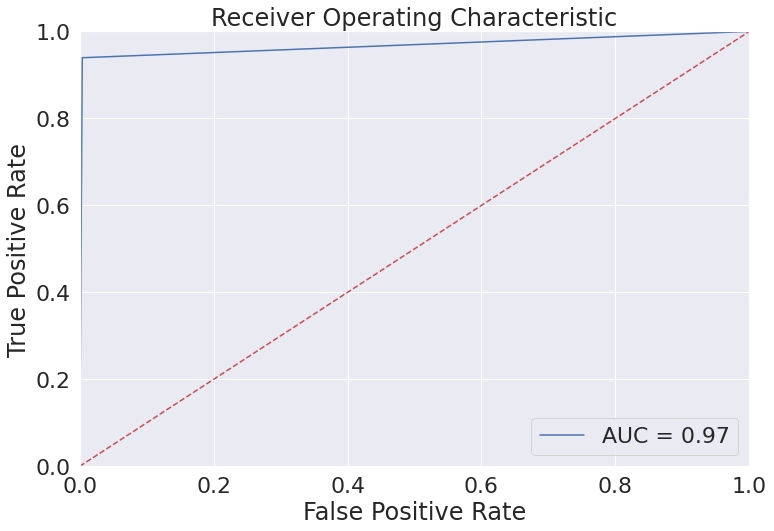

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [71]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'RF')

#### Test on Mirai

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.985     0.997     0.991     12929
           2      1.000     0.998     0.999     91686

    accuracy                          0.998    104615
   macro avg      0.992     0.997     0.995    104615
weighted avg      0.998     0.998     0.998    104615



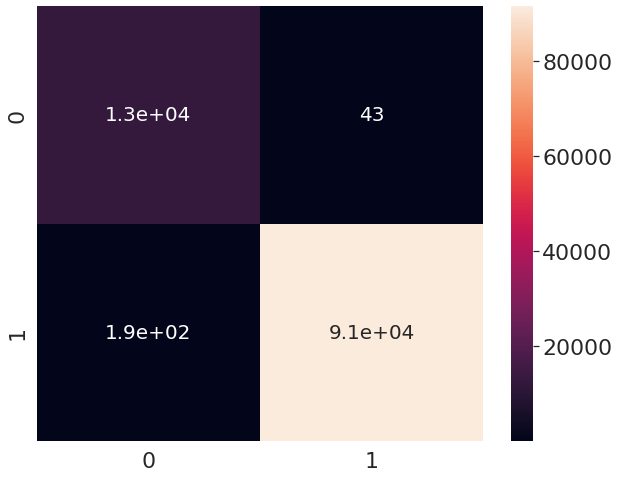

AUC score:  0.9972791130142034


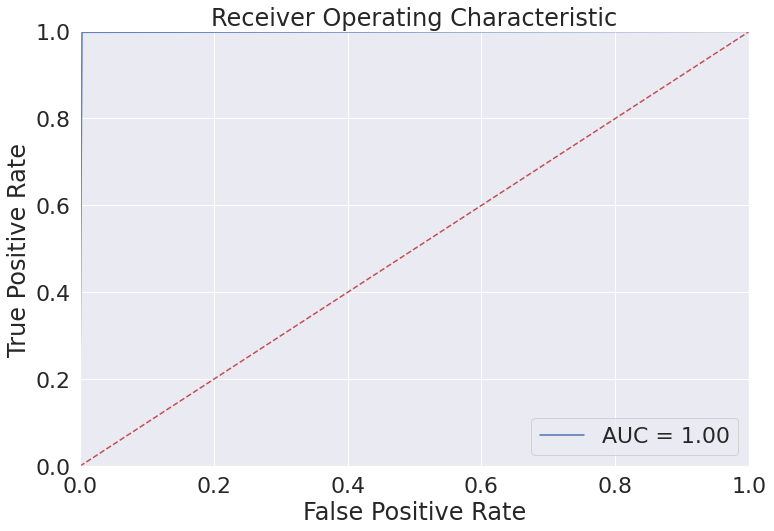

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.985     0.997     0.991     12929
           2      1.000     0.998     0.999     91686

    accuracy                          0.998    104615
   macro avg      0.992     0.997     0.995    104615
weighted avg      0.998     0.998     0.998    104615



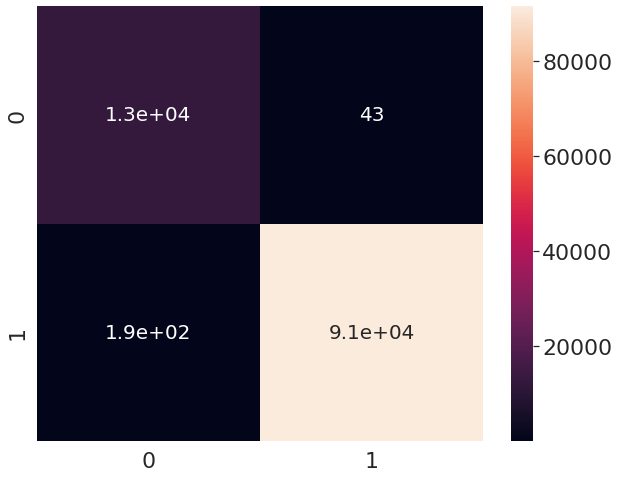

AUC score:  0.9972791130142034


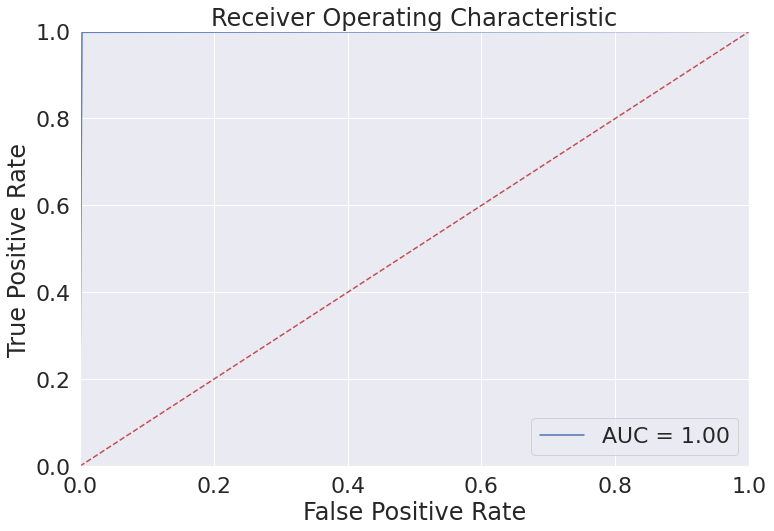

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'KNN')

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.985     0.997     0.991     12929
           2      1.000     0.998     0.999     91686

    accuracy                          0.998    104615
   macro avg      0.992     0.997     0.995    104615
weighted avg      0.998     0.998     0.998    104615



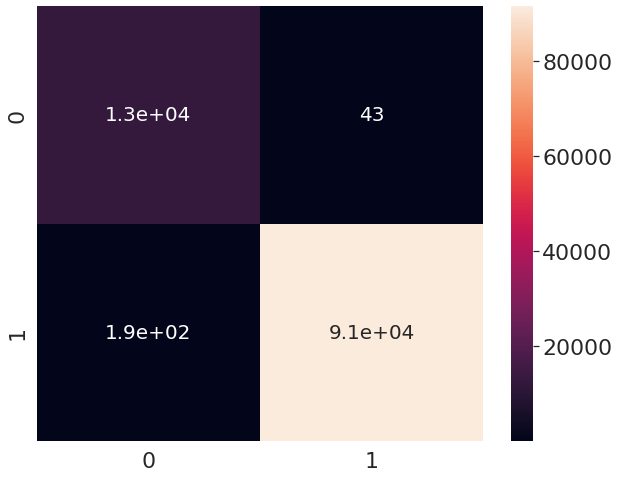

AUC score:  0.9972791130142034


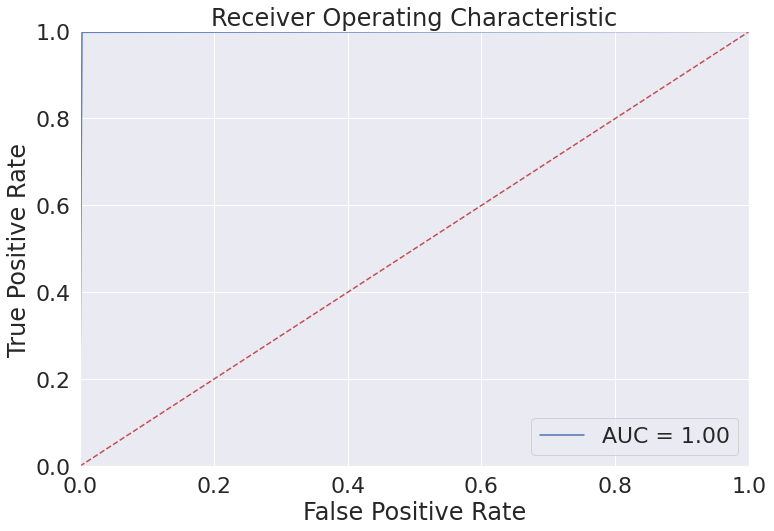

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [74]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SVM')

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.985     0.997     0.991     12929
           2      1.000     0.998     0.999     91686

    accuracy                          0.998    104615
   macro avg      0.992     0.997     0.995    104615
weighted avg      0.998     0.998     0.998    104615



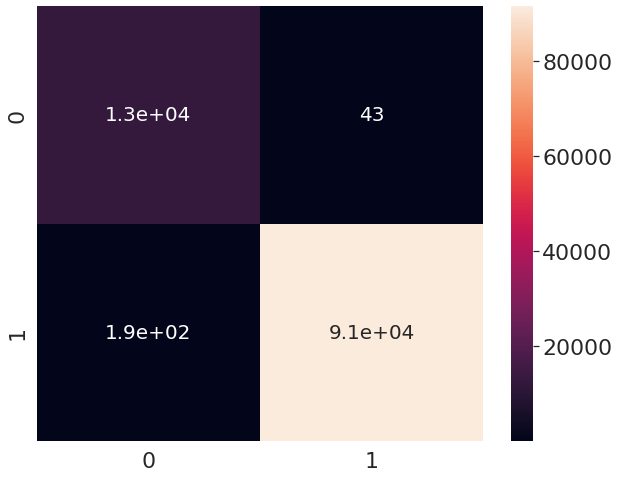

AUC score:  0.9972791130142034


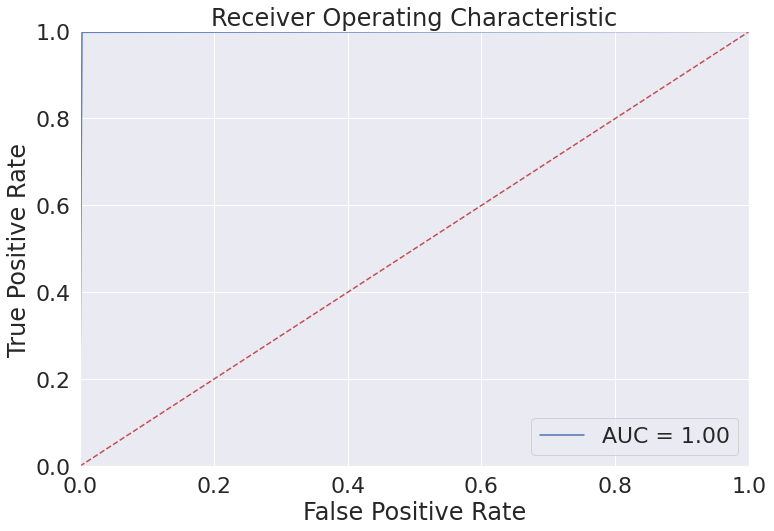

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SOFTMAX')

Shape:  (104615, 115) (104615,)
----------------------Test is starting----------------------
Scale data
Shape:  (104615, 115) (104615,)
Normalize data
Shape:  (104615, 115) (104615,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.985     0.997     0.991     12929
           2      1.000     0.998     0.999     91686

    accuracy                          0.998    104615
   macro avg      0.992     0.997     0.995    104615
weighted avg      0.998     0.998     0.998    104615



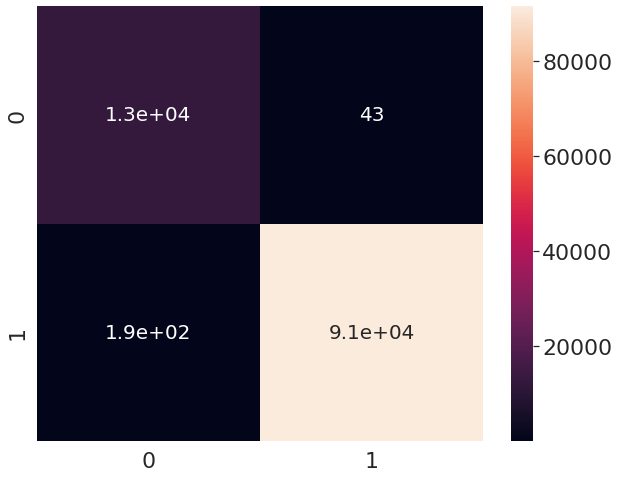

AUC score:  0.9972791130142034


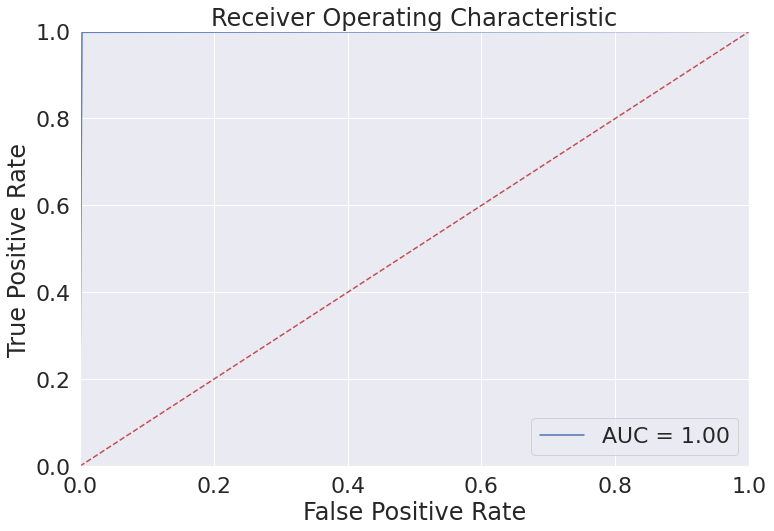

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'RF')


## 2.2.4. ANNEAL

### Train

In [77]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [78]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [79]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [80]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

In [81]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)

# 3. Train and test with other algos

In [30]:
X_train_mirai_1.shape, X_train_mirai_1.shape, X_test_gafgyt.shape, X_test_mirai.shape

((87014, 115), (87014, 115), (117676, 115), (104615, 115))

In [31]:
type(X_train_gafgyt_1), type(X_test_gafgyt)

(numpy.ndarray, numpy.ndarray)

In [32]:
y_train_gafgyt_1.shape, y_train_mirai_1.shape, y_test_gafgyt.shape, y_test_mirai.shape

((87014,), (87014,), (117676,), (104615,))

In [33]:
np.unique(y_train_gafgyt_1), np.unique(y_train_mirai_1)

(array([0, 1, 2, 3, 4, 5]), array([0, 1, 2, 3, 4, 5]))

In [34]:
from pyscripts.classifier import classify_train, classify_test

## 3.1. KNN

### Train on Gafgyt

In [35]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='KNN')

### test
#### On Gafgyt

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.984     0.999     0.992     18647
           1      1.000     0.997     0.998     99029

    accuracy                          0.997    117676
   macro avg      0.992     0.998     0.995    117676
weighted avg      0.997     0.997     0.997    117676



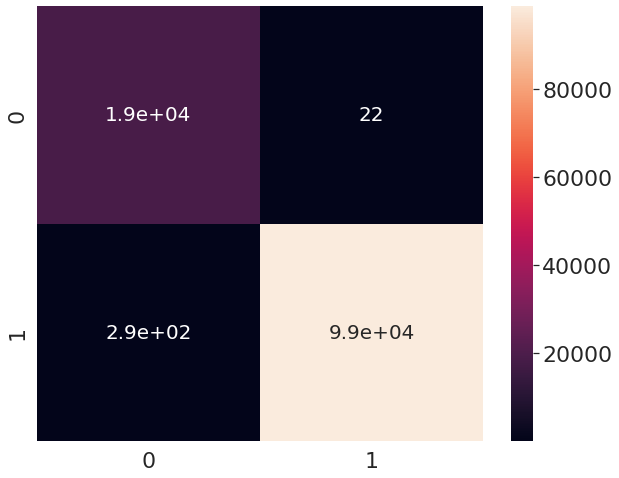

AUC score:  0.9979256791197122


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


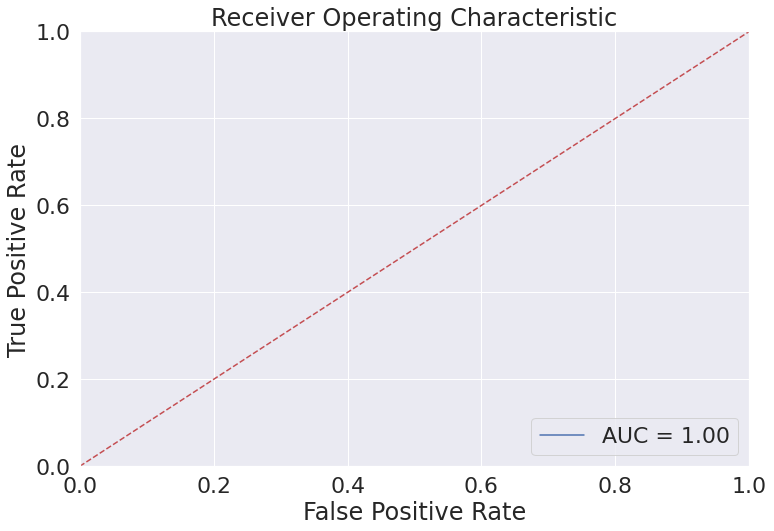

In [36]:
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

#### On Mirai

y_pred unique:  [0 1 2 3 4]
              precision    recall  f1-score   support

           0      0.273     0.999     0.429     12929
           1      1.000     0.625     0.769     91686

    accuracy                          0.671    104615
   macro avg      0.636     0.812     0.599    104615
weighted avg      0.910     0.671     0.727    104615



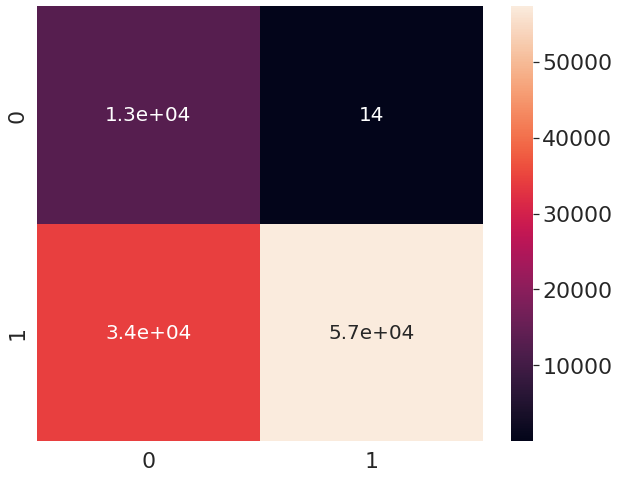

AUC score:  0.8117309022303838


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


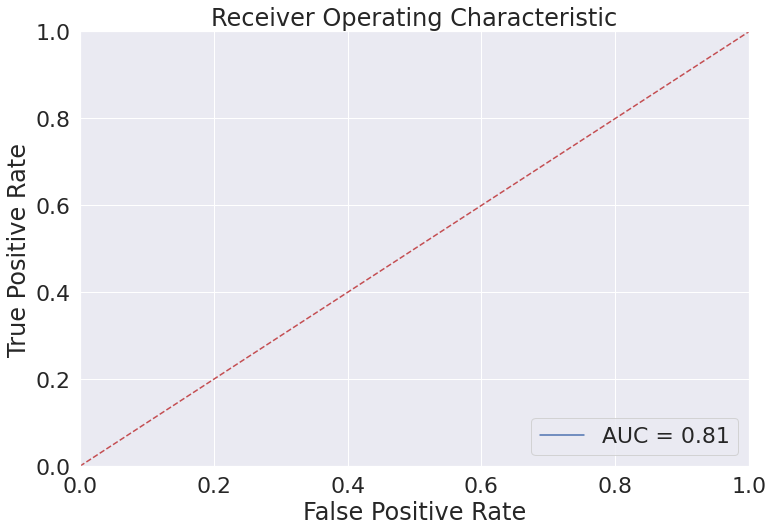

In [37]:
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [38]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='KNN')

### Testing
#### On Gafgyt

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.205     0.991     0.340     18647
           1      0.994     0.278     0.435     99029

    accuracy                          0.391    117676
   macro avg      0.600     0.635     0.388    117676
weighted avg      0.869     0.391     0.420    117676



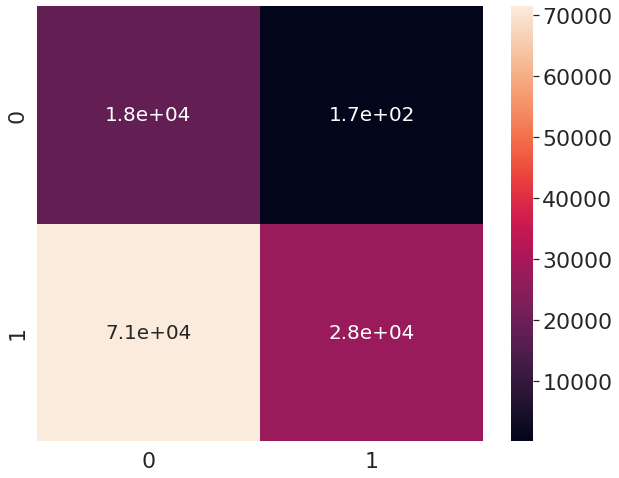

AUC score:  0.634642931478373


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


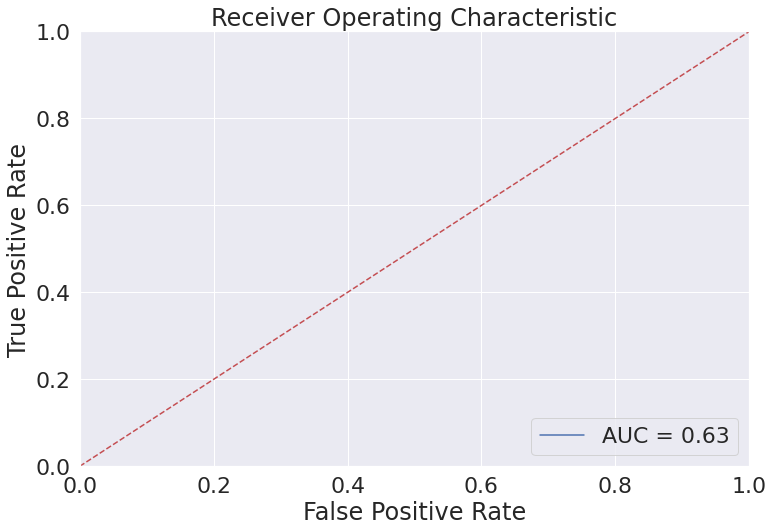

In [39]:
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.914     0.991     0.951     12929
           1      0.999     0.987     0.993     91686

    accuracy                          0.987    104615
   macro avg      0.956     0.989     0.972    104615
weighted avg      0.988     0.987     0.988    104615



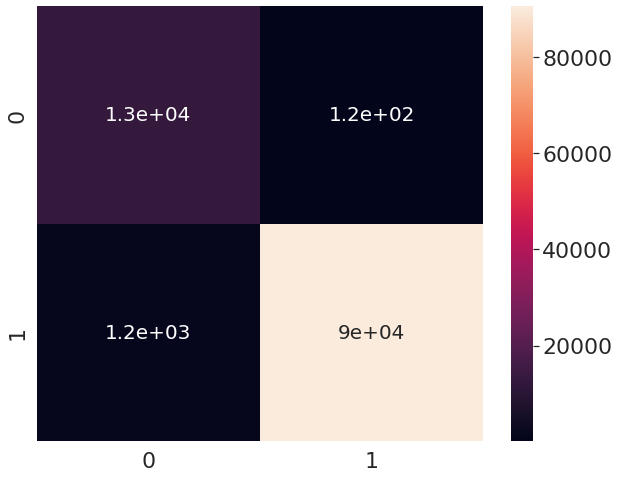

AUC score:  0.9888870876248484


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


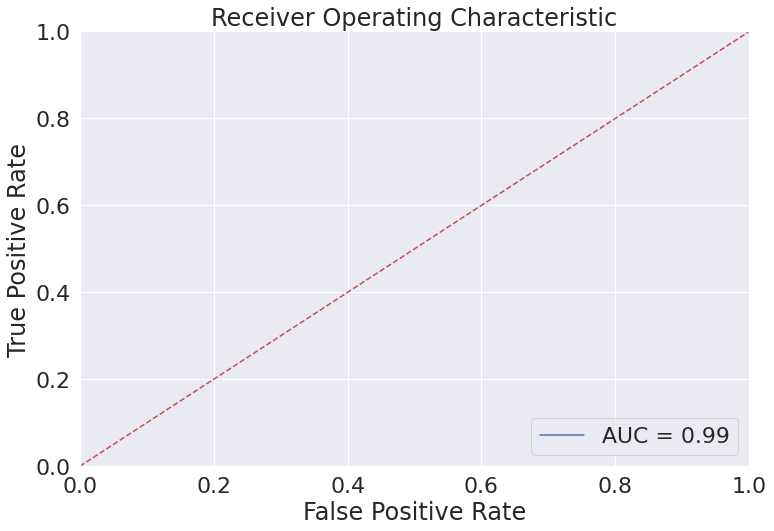

In [40]:
# on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.2. SVM
### Train on Gafgyt

In [41]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SVM')

y_pred unique:  [0 2 3]
              precision    recall  f1-score   support

           0      0.167     1.000     0.286     18647
           1      1.000     0.058     0.109     99029

    accuracy                          0.207    117676
   macro avg      0.583     0.529     0.197    117676
weighted avg      0.868     0.207     0.137    117676



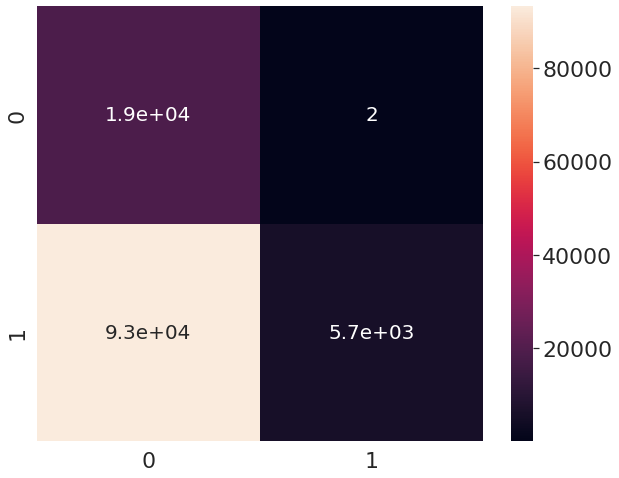

AUC score:  0.52886719324417


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


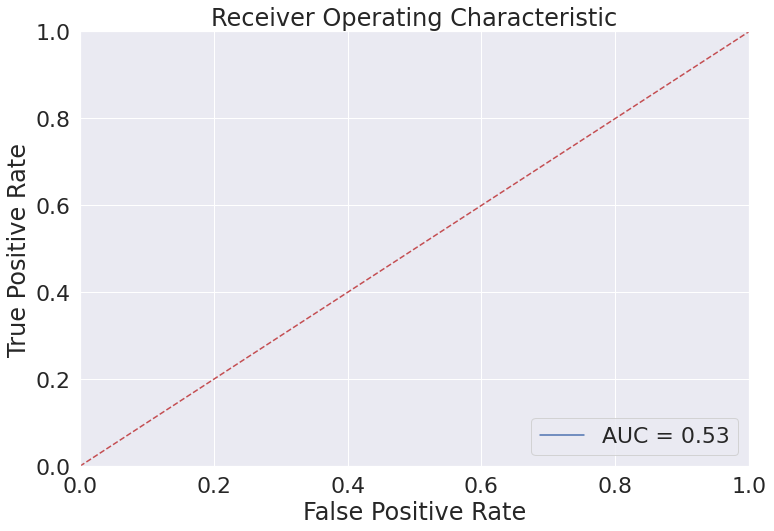

In [42]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 3]
              precision    recall  f1-score   support

           0      0.124     1.000     0.220     12929
           1      0.800     0.000     0.000     91686

    accuracy                          0.124    104615
   macro avg      0.462     0.500     0.110    104615
weighted avg      0.716     0.124     0.027    104615



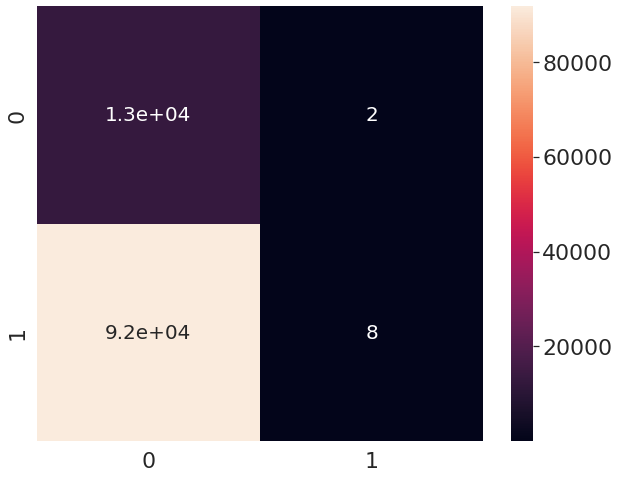

AUC score:  0.4999662816599122


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


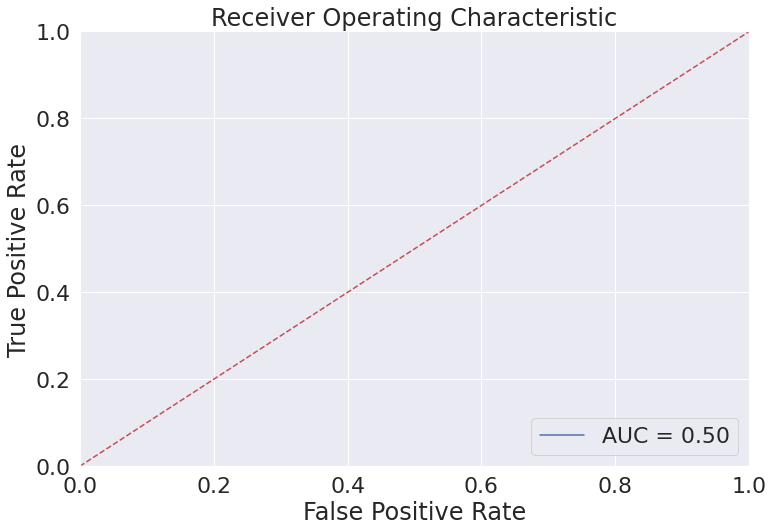

In [43]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [44]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SVM')

y_pred unique:  [0 4 5]
              precision    recall  f1-score   support

           0      0.159     1.000     0.274     18647
           1      1.000     0.001     0.003     99029

    accuracy                          0.160    117676
   macro avg      0.579     0.501     0.138    117676
weighted avg      0.867     0.160     0.046    117676



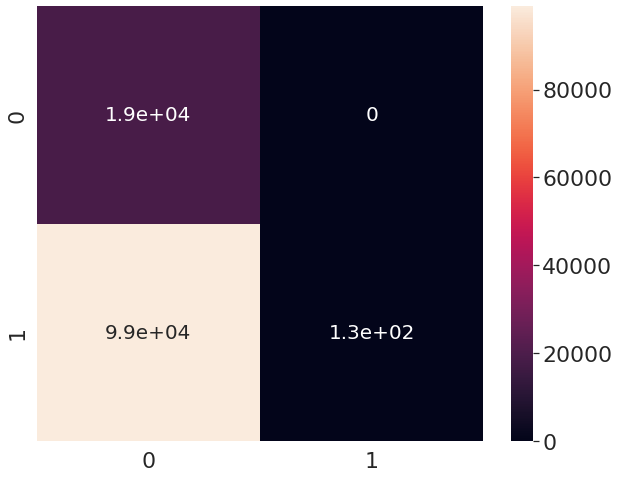

AUC score:  0.5006765694897455


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


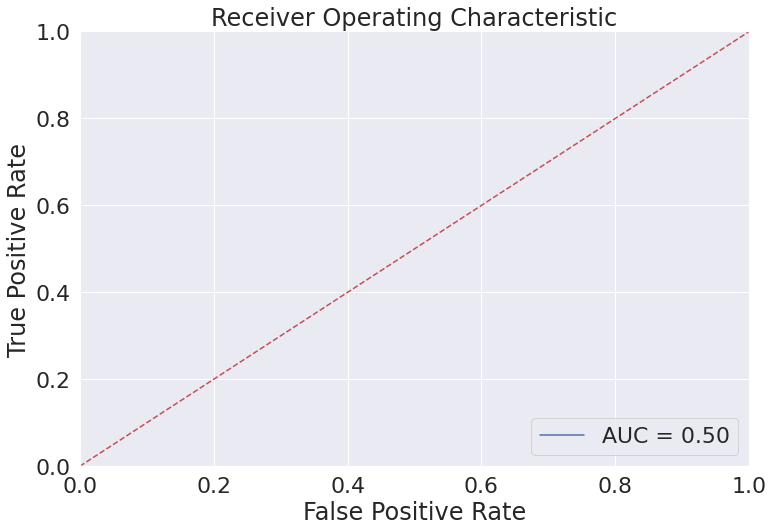

In [45]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 4 5]
              precision    recall  f1-score   support

           0      0.124     1.000     0.220     12929
           1      1.000     0.001     0.001     91686

    accuracy                          0.124    104615
   macro avg      0.562     0.500     0.111    104615
weighted avg      0.892     0.124     0.028    104615



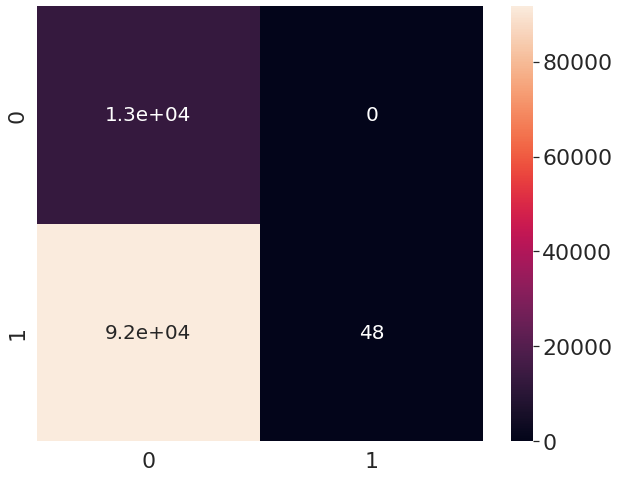

AUC score:  0.5002617629736273


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


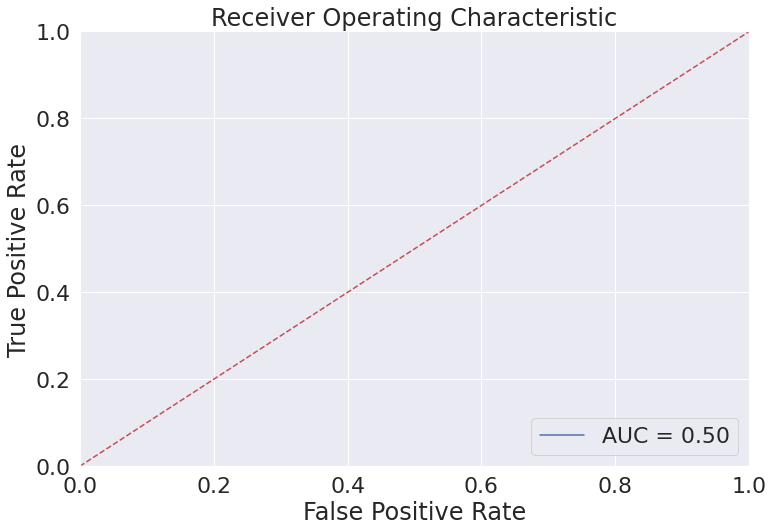

In [46]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.3. Softmax

### Train on Gafgyt

In [47]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='SOFTMAX')

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.158     1.000     0.274     18647
           1      0.000     0.000     0.000     99029

    accuracy                          0.158    117676
   macro avg      0.079     0.500     0.137    117676
weighted avg      0.025     0.158     0.043    117676



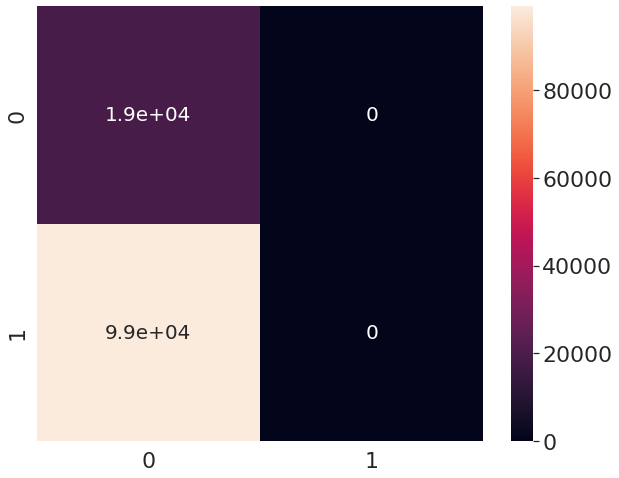

In [48]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.124     1.000     0.220     12929
           1      0.000     0.000     0.000     91686

    accuracy                          0.124    104615
   macro avg      0.062     0.500     0.110    104615
weighted avg      0.015     0.124     0.027    104615



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


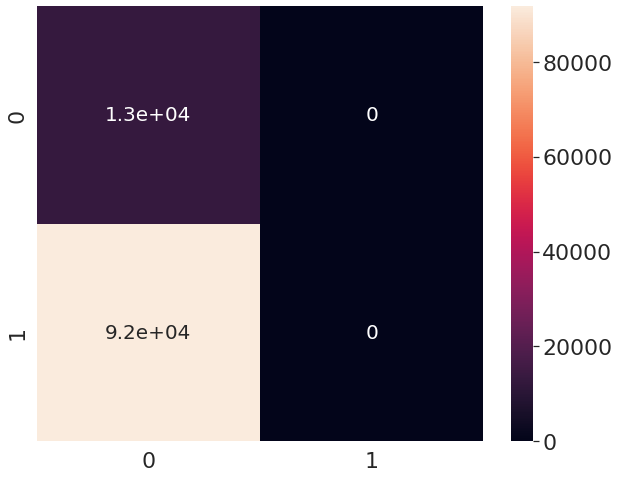

In [49]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [50]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='SOFTMAX')

/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.158     1.000     0.274     18647
           1      0.000     0.000     0.000     99029

    accuracy                          0.158    117676
   macro avg      0.079     0.500     0.137    117676
weighted avg      0.025     0.158     0.043    117676



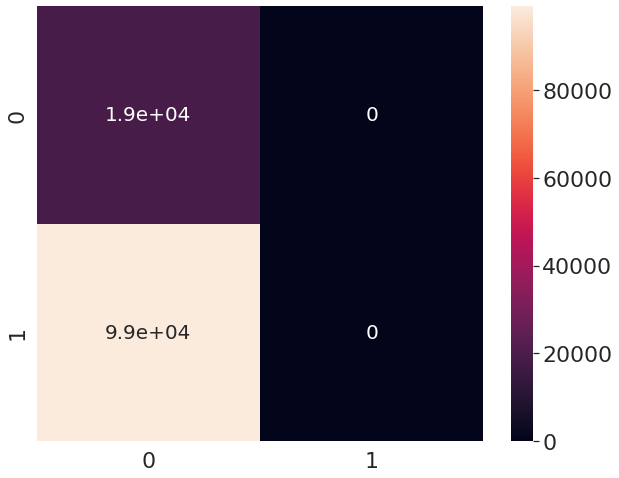

In [51]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0]
              precision    recall  f1-score   support

           0      0.124     1.000     0.220     12929
           1      0.000     0.000     0.000     91686

    accuracy                          0.124    104615
   macro avg      0.062     0.500     0.110    104615
weighted avg      0.015     0.124     0.027    104615



/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


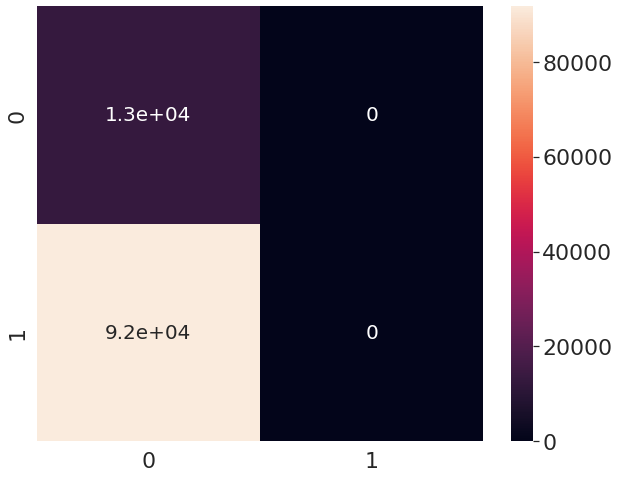

In [52]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.4. Random Forest

### Train on Gafgyt

In [53]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='RF')

y_pred unique:  [0 1 3 4 5]
              precision    recall  f1-score   support

           0      0.834     1.000     0.909     18647
           1      1.000     0.962     0.981     99029

    accuracy                          0.968    117676
   macro avg      0.917     0.981     0.945    117676
weighted avg      0.974     0.968     0.970    117676



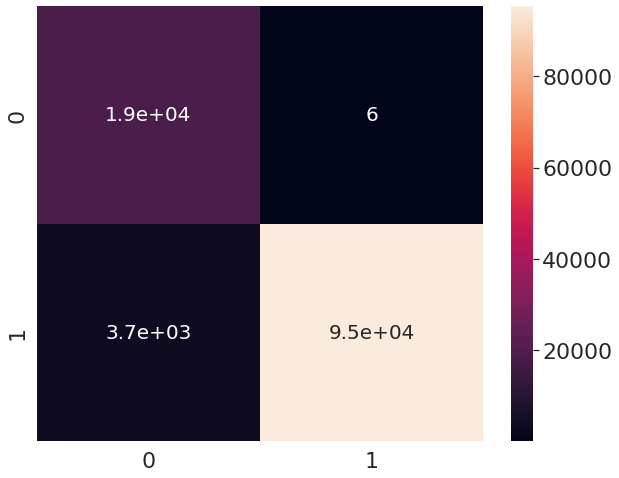

AUC score:  9.810870334884804e-01


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


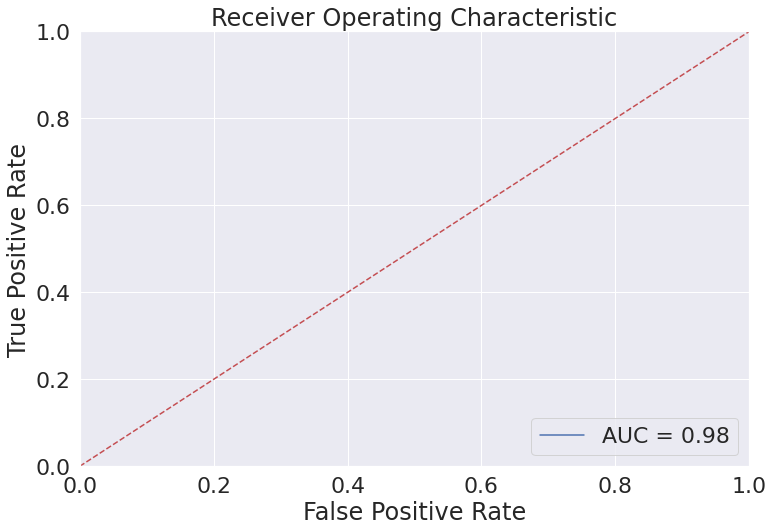

In [54]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 3 4 5]
              precision    recall  f1-score   support

           0      0.845     1.000     0.916     12929
           1      1.000     0.974     0.987     91686

    accuracy                          0.977    104615
   macro avg      0.922     0.987     0.951    104615
weighted avg      0.981     0.977     0.978    104615



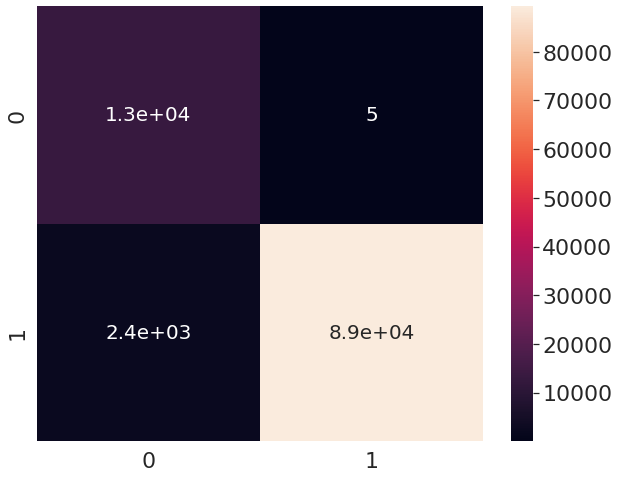

AUC score:  0.9868657292353987


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


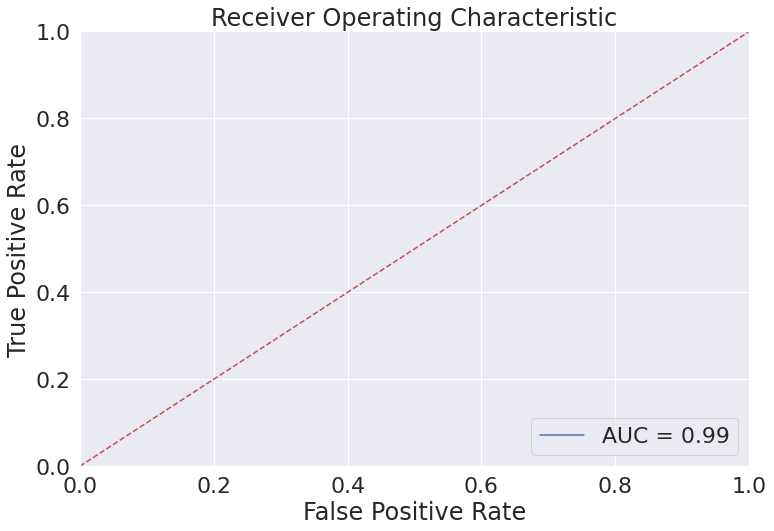

In [55]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [56]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='RF')

y_pred unique:  [0 2]
              precision    recall  f1-score   support

           0      0.218     1.000     0.358     18647
           1      1.000     0.326     0.492     99029

    accuracy                          0.433    117676
   macro avg      0.609     0.663     0.425    117676
weighted avg      0.876     0.433     0.471    117676



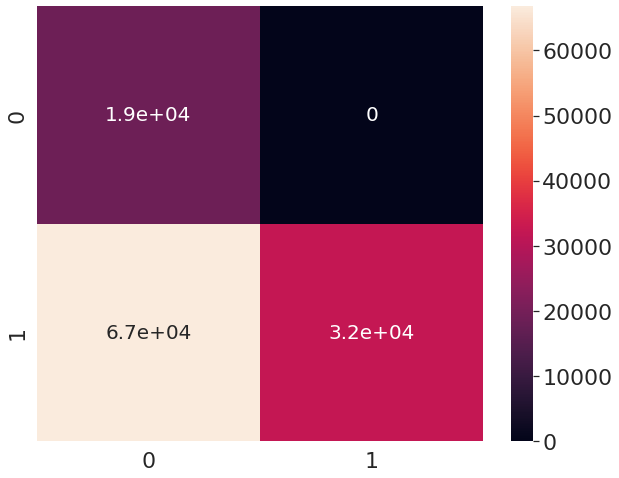

AUC score:  0.6630179038463481


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


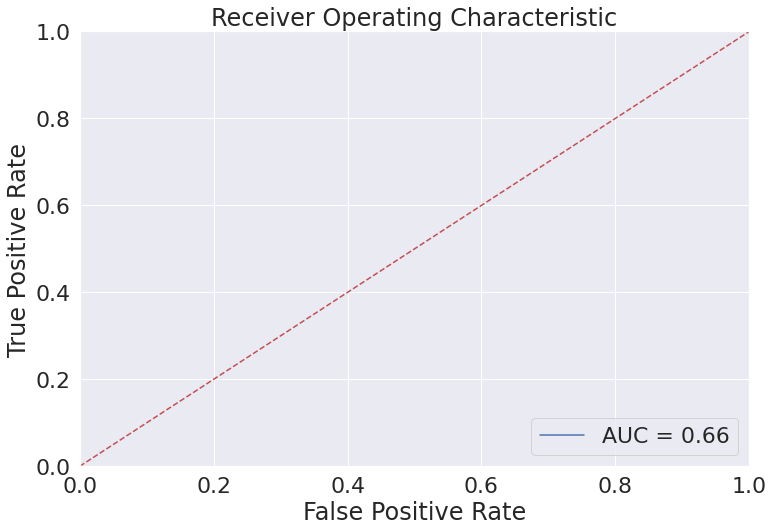

In [57]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 4 5]
              precision    recall  f1-score   support

           0      0.999     1.000     1.000     12929
           1      1.000     1.000     1.000     91686

    accuracy                          1.000    104615
   macro avg      1.000     1.000     1.000    104615
weighted avg      1.000     1.000     1.000    104615



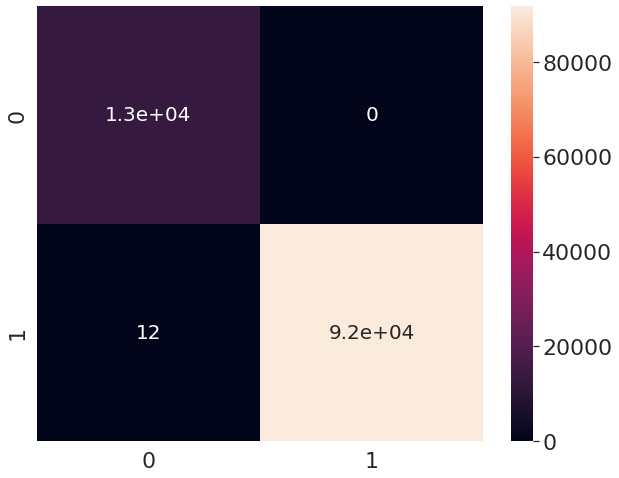

AUC score:  0.9999345592565931


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


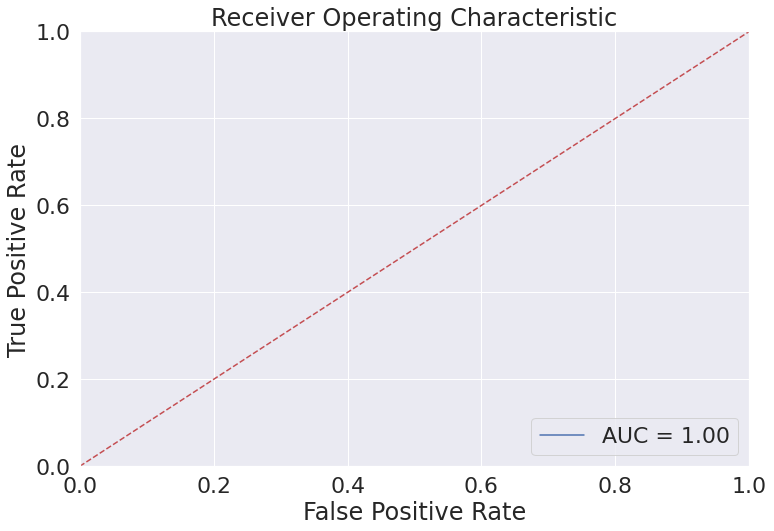

In [58]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.5. Decision Tree

### Train on Gafgyt

In [59]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='DT')

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.999     1.000     0.999     18647
           1      1.000     1.000     1.000     99029

    accuracy                          1.000    117676
   macro avg      0.999     1.000     1.000    117676
weighted avg      1.000     1.000     1.000    117676



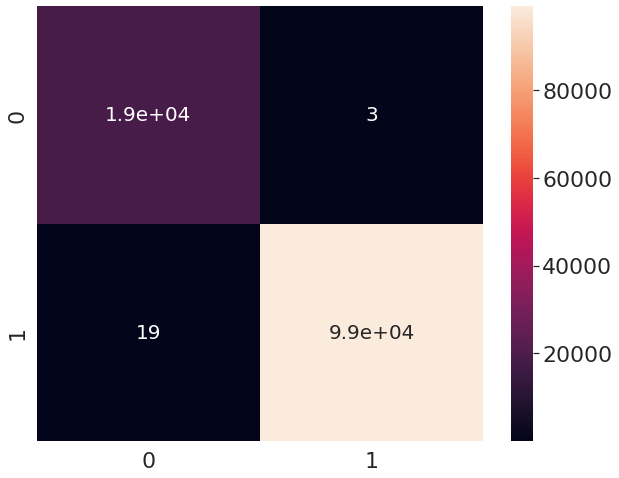

AUC score:  0.999823626611047


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


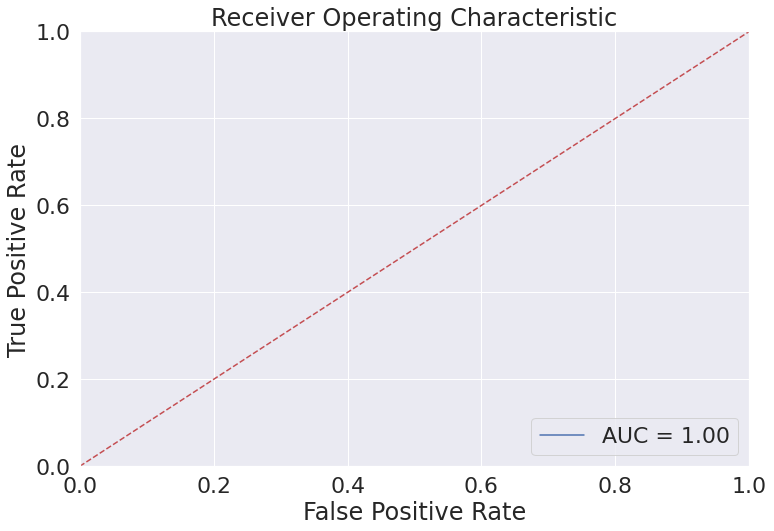

In [60]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.532     1.000     0.694     12929
           1      1.000     0.876     0.934     91686

    accuracy                          0.891    104615
   macro avg      0.766     0.938     0.814    104615
weighted avg      0.942     0.891     0.904    104615



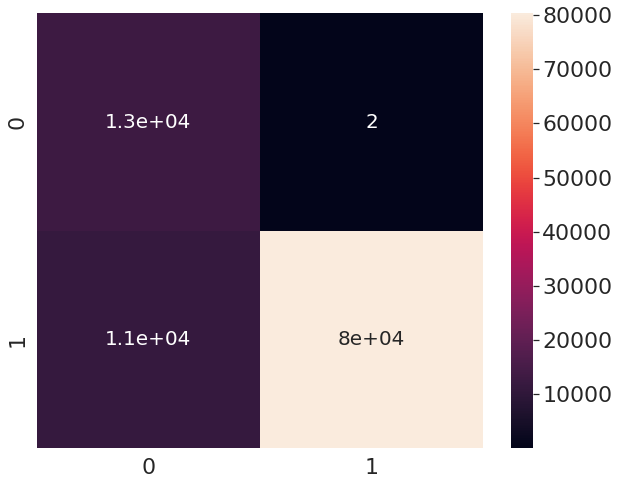

AUC score:  0.9379011899338034


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


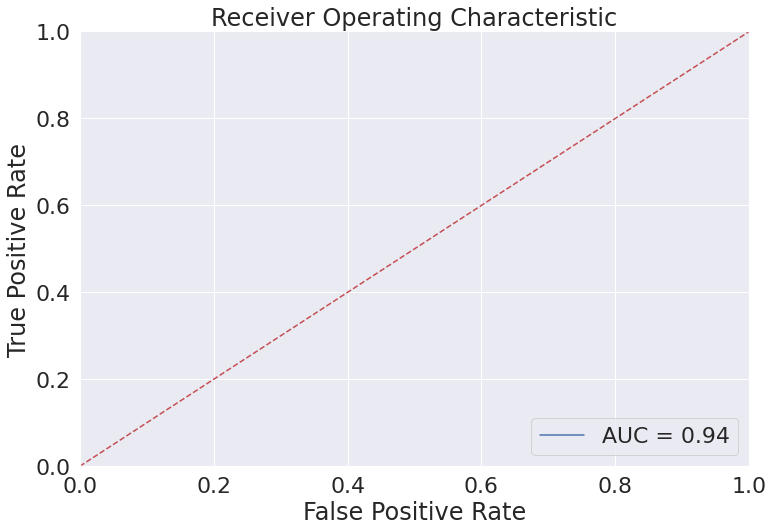

In [61]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [62]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='DT')

y_pred unique:  [0 3]
              precision    recall  f1-score   support

           0      0.230     1.000     0.374     18647
           1      1.000     0.369     0.539     99029

    accuracy                          0.469    117676
   macro avg      0.615     0.684     0.456    117676
weighted avg      0.878     0.469     0.513    117676



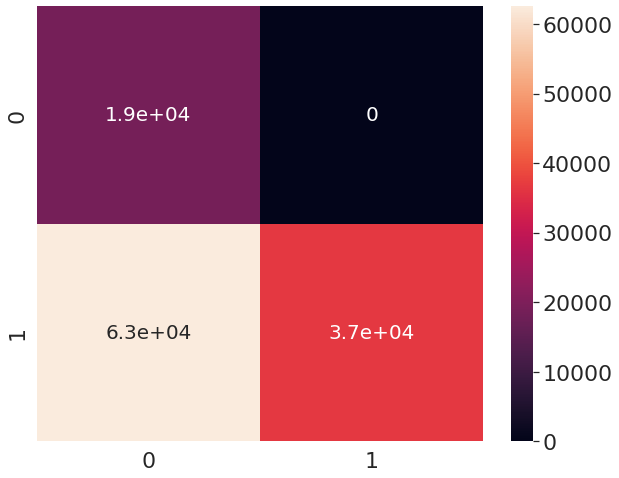

AUC score:  0.6843348917993719


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


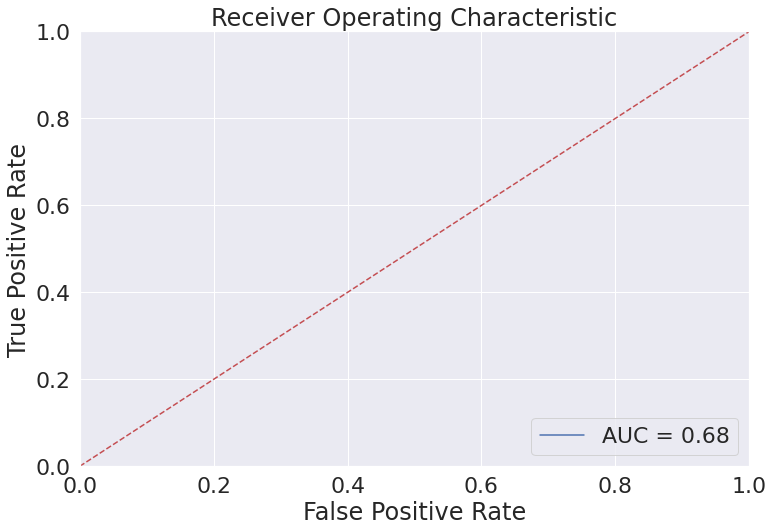

In [63]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     12929
           1      1.000     1.000     1.000     91686

    accuracy                          1.000    104615
   macro avg      1.000     1.000     1.000    104615
weighted avg      1.000     1.000     1.000    104615



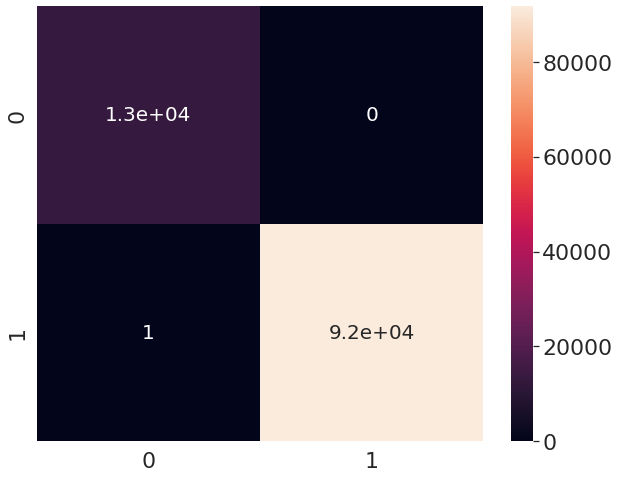

AUC score:  0.9999945466047161


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


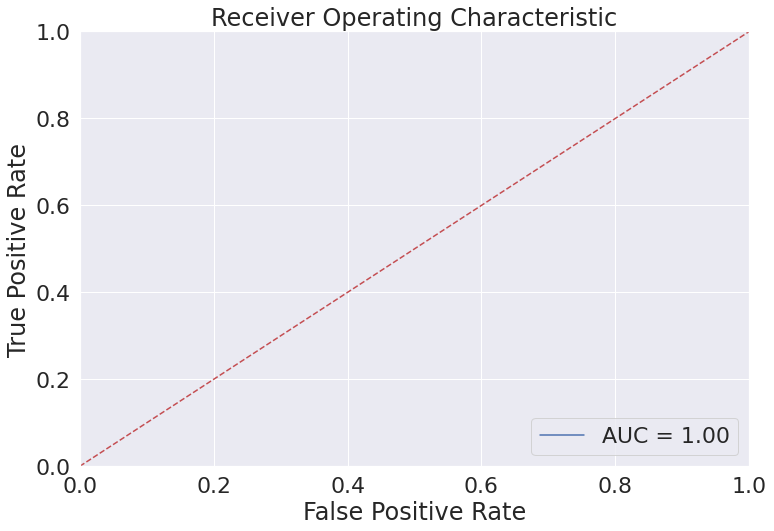

In [64]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

## 3.6. XGB

### Train on Gafgyt

In [65]:
clf = classify_train(X_train=X_train_gafgyt_1, y_train=y_train_gafgyt_1, algo='XGB')

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      0.999     1.000     0.999     18647
           1      1.000     1.000     1.000     99029

    accuracy                          1.000    117676
   macro avg      0.999     1.000     1.000    117676
weighted avg      1.000     1.000     1.000    117676



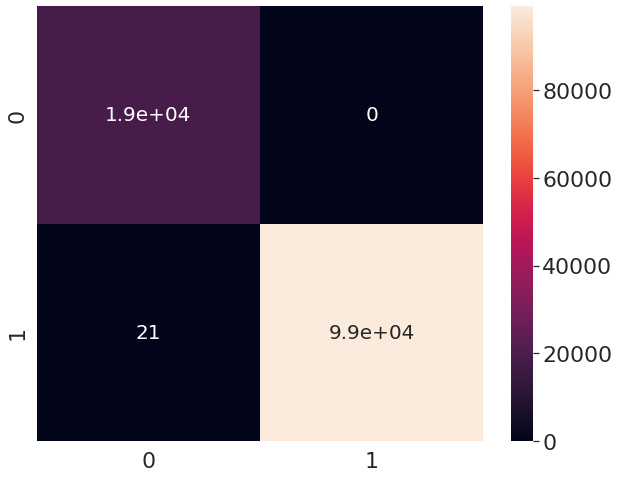

AUC score:  0.9998939704530996


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


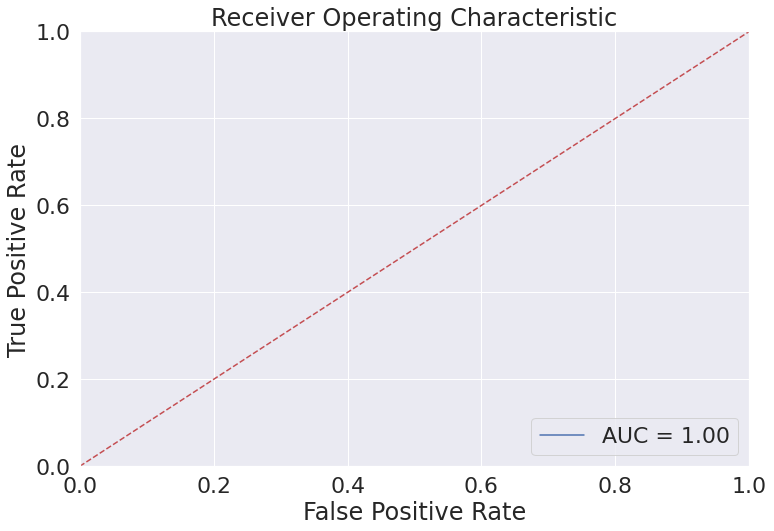

In [66]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4]
              precision    recall  f1-score   support

           0      0.999     1.000     1.000     12929
           1      1.000     1.000     1.000     91686

    accuracy                          1.000    104615
   macro avg      1.000     1.000     1.000    104615
weighted avg      1.000     1.000     1.000    104615



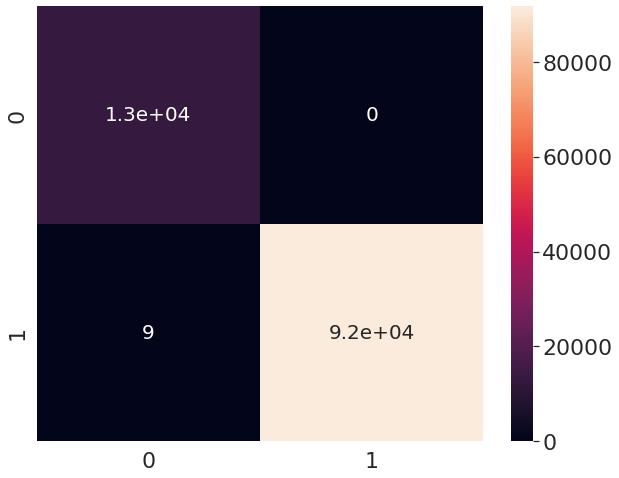

AUC score:  0.9999509194424449


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


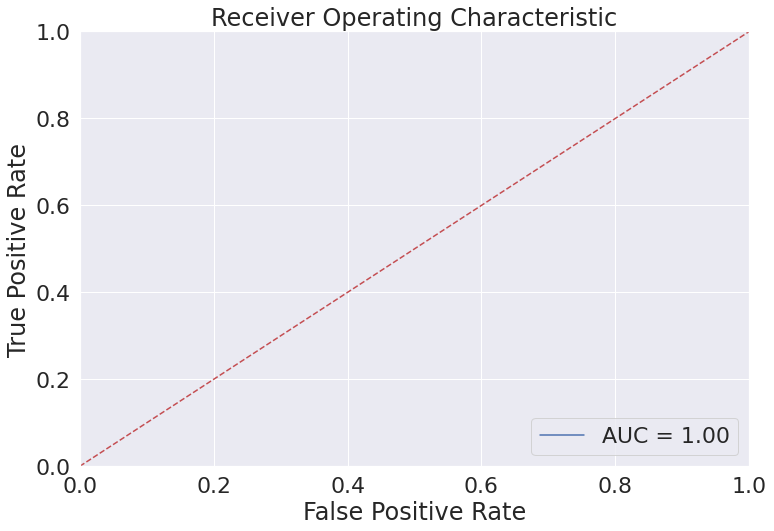

In [67]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)

### Train on Mirai

In [68]:
clf = classify_train(X_train=X_train_mirai_1, y_train=y_train_mirai_1, algo='XGB')

y_pred unique:  [0 1 3 4 5]
              precision    recall  f1-score   support

           0      0.195     1.000     0.326     18647
           1      1.000     0.220     0.361     99029

    accuracy                          0.344    117676
   macro avg      0.597     0.610     0.343    117676
weighted avg      0.872     0.344     0.355    117676



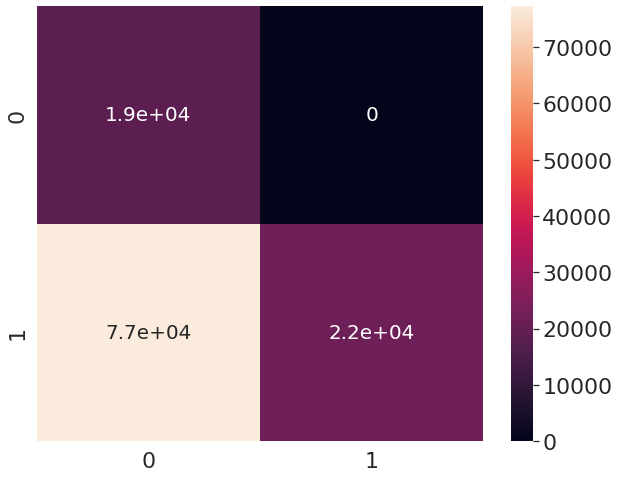

AUC score:  0.6101041109170041


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


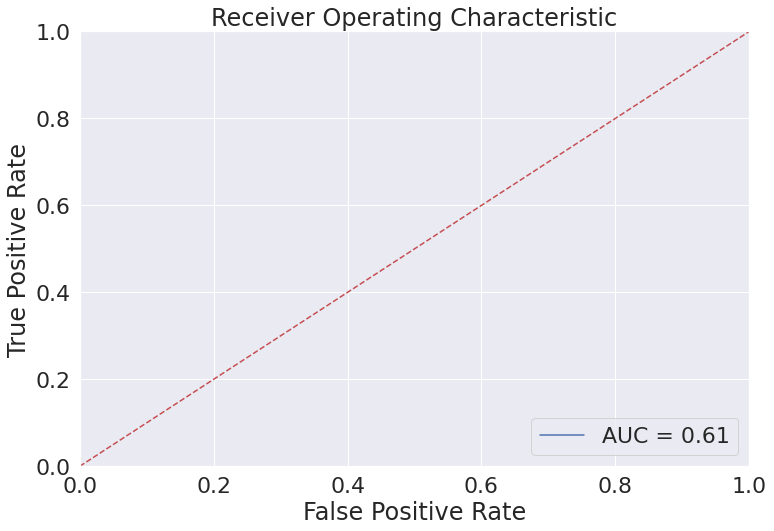

In [69]:
# Testing on gafgyt
classify_test(clf=clf, X_test=X_test_gafgyt, y_test=y_test_gafgyt)

y_pred unique:  [0 1 2 3 4 5]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000     12929
           1      1.000     1.000     1.000     91686

    accuracy                          1.000    104615
   macro avg      1.000     1.000     1.000    104615
weighted avg      1.000     1.000     1.000    104615



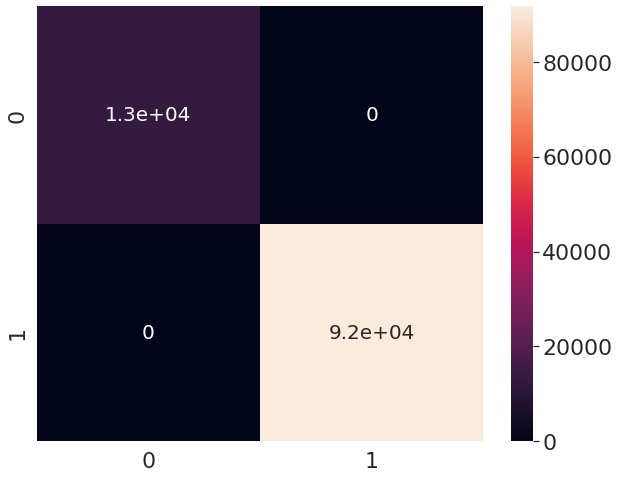

AUC score:  1.0


/home/huunoi/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


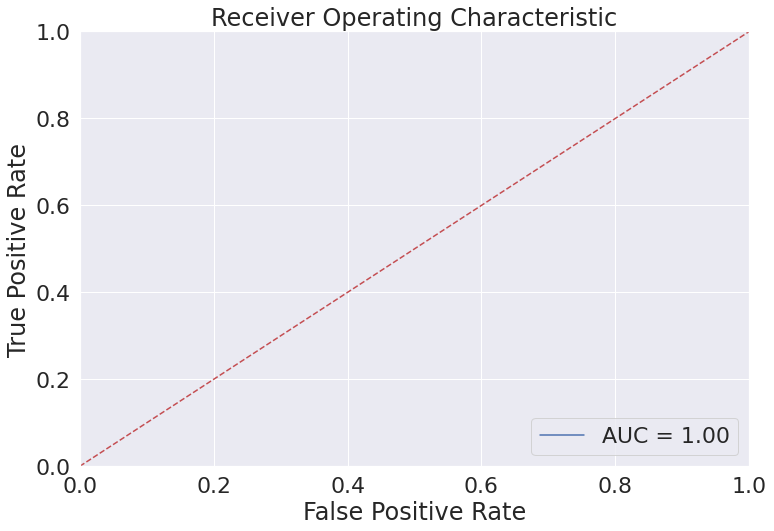

In [70]:
# Testing on Mirai
classify_test(clf=clf, X_test=X_test_mirai, y_test=y_test_mirai)